In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
import re
import seaborn as sns

In [108]:
home_path = '/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/'
PROBLEM = 'regression' # 'regression' or 'given_presence' or 'classification'
aggregate_features = False
aggregation = '_aggregated_features' if aggregate_features else ''
SPECIES = "segal_species"

In [109]:
single_style = "nature_single.mplstyle"
double_style = "nature_double.mplstyle"
third_style = "nature_third.mplstyle"
plt.rcParams["figure.dpi"] = 150
plt.style.use(single_style)
palette = sns.color_palette("Set2", n_colors=8)

In [110]:
def read_results(df):
    output = []
    for col in df.columns:
        output.append(df[col])
    return tuple(output)

In [111]:
diet_mb = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/diet_mb_pathways.pkl")
with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/my_lists_pathways.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
base_features, all_features, targets = loaded_lists

# Is this needed ?
# diet_mb.columns = diet_mb.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
# targets = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in targets]
# all_features = [re.sub(r'[^a-zA-Z0-9_]', '_', x) for x in all_features]

diet_mb

,Acorn squash,Alfalfa sprouts,Almond Beverage,Almond flour,Almond spread,Almonds,Amba,Apple,Apple Cake,Apple Vinegar,...,SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I,SO4ASSIM-PWY: assimilatory sulfate reduction I,SULFATE-CYS-PWY: superpathway of sulfate assimilation and cysteine biosynthesis,TCA-GLYOX-BYPASS: superpathway of glyoxylate bypass and TCA,TCA: TCA cycle I (prokaryotic),THISYNARA-PWY: superpathway of thiamine diphosphate biosynthesis III (eukaryotes),THRESYN-PWY: superpathway of L-threonine biosynthesis,TRNA-CHARGING-PWY: tRNA charging,UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine biosynthesis I,VALSYN-PWY: L-valine biosynthesis
RegistrationCode,,,,,,,,,,,,,,,,,,,,,
10K_1000942861,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.016416,0.000000,0.0,...,0.009536,0.000000,0.000000,0.000000,0.000000,0.002205,0.008973,0.012579,0.002074,0.015673
10K_1001201093,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.013895,0.000000,0.0,...,0.010022,0.000000,0.000000,0.000000,0.000000,0.006497,0.006011,0.011701,0.001115,0.016344
10K_1002254441,0.0,0.0,0.0,0.0,0.0,0.081238,0.0,0.000000,0.000000,0.0,...,0.006122,0.000000,0.000000,0.000000,0.000000,0.001063,0.006368,0.010865,0.005072,0.018794
10K_1003113258,0.0,0.0,0.0,0.0,0.0,0.002048,0.0,0.008929,0.000000,0.0,...,0.004102,0.000000,0.000000,0.000000,0.000000,0.001092,0.005317,0.023664,0.008836,0.014888
10K_1007330152,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,...,0.013066,0.000000,0.000000,0.000000,0.000000,0.002455,0.006434,0.013101,0.003003,0.016973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10K_9996884777,0.0,0.0,0.0,0.0,0.0,0.002401,0.0,0.000000,0.000000,0.0,...,0.005518,0.000000,0.000000,0.000000,0.000000,0.000106,0.006608,0.020721,0.007442,0.016000
10K_9998420917,0.0,0.0,0.0,0.0,0.0,0.019995,0.0,0.018783,0.000000,0.0,...,0.006877,0.000000,0.000000,0.000000,0.000000,0.001785,0.007174,0.018449,0.004949,0.013831
10K_9998635752,0.0,0.0,0.0,0.0,0.0,0.001607,0.0,0.011305,0.000000,0.0,...,0.004144,0.000544,0.000801,0.000000,0.000000,0.001716,0.002874,0.017149,0.002172,0.023256


In [112]:
all_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

Handle a case where diet features are aggregated into main categories

In [180]:
category_nice_names = {
        'AlcoholicDrinks': 'Alcoholic Drinks',
        'fruitjuicesandsoftdrinks': 'Fruit Juices & Soft Drinks',
        'Beefveallambandothermeatproducts': 'Beef, Veal, Lamb & Other Meat',
        'Proccessedmeatproducts': 'Processed Meat Products',
        'Poultryanditsproducts': 'Poultry & Its Products',
        'bakedgoods': 'Baked Goods',
        'Bread': 'Bread',
        'Bread_wholewheat': 'Whole Wheat Bread',
        'FastFoods': 'Fast Foods',
        'Snacks': 'Snacks',
        'sweets': 'Sweets',
        'Cannedvegandfruits': 'Canned Vegetables & Fruits',
        'Fruits': 'Fruits',
        'MedOilandfats': 'Mediterranean Oils & Fats',
        'Vegetables': 'Vegetables',
        'Soupsandsauces': 'Soups & Sauces',
        'Cereals': 'Cereals',
        'Deepfriedfoods': 'Deep Fried Foods',
        'Drinks': 'Drinks',
        'sweetmilkproducts': 'Sweetened Milk Products',
        'Eggsandtheirproducts': 'Eggs & Their Products',
        'Fishandseafood': 'Fish & Seafood',
        'Hardcheese': 'Hard Cheese',
        'milkcreamcheeseandyogurts': 'Milk, Cream, Cheese & Yogurts',
        'Industrializedvegetarianfoodreadytoeat': 'Processed Vegetarian Food',
        'Oilsandfats': 'Oils & Fats',
        'Others': 'Other Foods',
        'PastaGrainsandSidedishes': 'Pasta, Grains & Side Dishes',
        'PastaGrainsandSidedishes_wholewheat': 'Whole Wheat Pasta & Grains',
        'Pulsesandproducts': 'Pulses & Their Products',
        'Spicesandherbs': 'Spices & Herbs',
        'Nutsseedsandproducts': 'Nuts, Seeds & Their Products'
    }


if aggregate_features:
    original_features = all_features.copy()  
    
    with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{SPECIES}/food_categories.pkl', 'rb') as file1, \
         open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/aggregated_feature_names_LGBM_pathways.pkl', 'rb') as file2:
        feature_to_category, categories = pickle.load(file1)
        all_features = pickle.load(file2).tolist()  # Overwrite the current features list with the aggregated features

    all_features = [category_nice_names[cat] if cat in category_nice_names else cat for cat in all_features]

In [181]:
feature_pretty_names = {
    'Protein': "Protein",
    'Total lipid (fat)': "Total fat",
    'Carbohydrate, by difference': "Carbohydrates",
    'Energy': "Energy",
    'Alcohol, ethyl': "Alcohol",
    'Water': "Water",
    'Fiber, total dietary': "Dietary fiber",
    'Calcium, Ca': "Calcium",
    'Iron, Fe': "Iron",
    'Magnesium, Mg': "Magnesium",
    'Phosphorus, P': "Phosphorus",
    'Potassium, K': "Potassium",
    'Sodium, Na': "Sodium",
    'Zinc, Zn': "Zinc",
    'Copper, Cu': "Copper",
    'Vitamin C, total ascorbic acid': "Vitamin C",
    'Thiamin': "Vitamin B1 (thiamin)",
    'Riboflavin': "Vitamin B2 (riboflavin)",
    'Niacin': "Vitamin B3 (niacin)",
    'Vitamin B-6': "Vitamin B6",
    'Folate, total': "Folate",
    'Vitamin B-12': "Vitamin B12",
    'Cholesterol': "Cholesterol",
    'Fatty acids, total saturated': "Saturated fat",
    'Fatty acids, total monounsaturated': "Monounsaturated fat",
    'Fatty acids, total polyunsaturated': "Polyunsaturated fat",
    'Vitamin D (D2 + D3)': "Vitamin D",
    'Sugars, Total': "Total sugars",
    'Fatty acids, total trans': "Trans fat",
    'Vitamin A, RAE': "Vitamin A (RAE)",
    'Pantothenic acid': "Vitamin B5 (pantothenic acid)",
    'Selenium, Se': "Selenium",
    'Choline, total': "Choline",
    'Manganese, Mn': "Manganese",
    'Fructose': "Fructose",
    'Vitamin K': "Vitamin K",
    'Iodine': "Iodine",
    'Sugar alcohols': "Sugar alcohols",
    'Biotin': "Vitamin B7 (biotin)",
    'Ash': "Ash",
    'Betaine': "Betaine",
    'Caffeine': "Caffeine",
    'Campesterol': "Campesterol",
    'Fluoride, F': "Fluoride",
    'Glucose': "Glucose",
    'Lutein + zeaxanthin': "Lutein & zeaxanthin",
    'Lycopene': "Lycopene",
    'Phytosterols': "Phytosterols",
    'Starch': "Starch",
    'omega_6': "Omega-6",
    'omega_3': "Omega-3",
    'vitamin_E': "Vitamin E",
    'Foods_per_meal': "Foods per meal",
    'Foods_per_day': "Foods per day",
    'Meals_per_day': "Meals per day",
    'Fasting_window': "Fasting window",
    'plant_foods_per_day': "Plant foods per day",
    'plant_foods_per_week': "Plant foods per week",
    'plant_energy_pct': "Plant energy %",
    'plant_protein_pct': "Plant protein %",
    'plant_fat_pct': "Plant fat %",
    'pct_protein_calories': "% calories from protein",
    'pct_carb_calories': "% calories from carbs",
    'pct_fat_calories': "% calories from fat",
    'pct_alcohol_calories': "% calories from alcohol",
    'sat_to_total_lipids_ratio': "Saturated / total fat",
    'trans_to_total_lipids_ratio': "Trans / total fat",
    'mono_to_total_lipids_ratio': "Monounsaturated / total fat",
    'poly_to_total_lipids_ratio': "Polyunsaturated / total fat",
    'omega3_to_total_lipids_ratio': "Omega-3 / total fat",
    'omega6_to_total_lipids_ratio': "Omega-6 / total fat",
    'omega6_to_omega3_ratio': "Omega-6 / omega-3",
    'pct_saturated_fat_calories': "% calories from saturated fat",
    'sex': "Sex"
}


In [182]:
diet_rename_dict = {
    'vegetarian_score_per_day': "Vegetarian",
    'wfpb_score_per_day': "Whole-food, plant-based",  # Whole-food, plant-based
    'vegan_score_per_day': "Vegan",
    'pescatarian_score_per_day': "Pescatarian",
    'carnivore_score_per_day': "Animal-based",
    'NOVA_pct': "UPF, %",
    'IMEDAS_score_per_day': "I-MEDAS",
    'eatLANCET_score_per_day': "EAT-Lancet",
    'aHEI_score_per_day': "AHEI",
    'hPDI_score_per_day': "hPDI",
    'DASH_score': "DASH",
    'keto': "Extremely low carbs",
    'low_carb_diet': "Low carbs"
}

diet_cv_dict = {k + "_cv": v + " CV" for k, v in diet_rename_dict.items()}

nutrient_rename_dict = {}

diet_rename_dict.update(category_nice_names)
diet_rename_dict.update(diet_cv_dict)
diet_rename_dict.update(feature_pretty_names)
diet_rename_dict


{'vegetarian_score_per_day': 'Vegetarian',
 'wfpb_score_per_day': 'Whole-food, plant-based',
 'vegan_score_per_day': 'Vegan',
 'pescatarian_score_per_day': 'Pescatarian',
 'carnivore_score_per_day': 'Animal-based',
 'NOVA_pct': 'UPF, %',
 'IMEDAS_score_per_day': 'I-MEDAS',
 'eatLANCET_score_per_day': 'EAT-Lancet',
 'aHEI_score_per_day': 'AHEI',
 'hPDI_score_per_day': 'hPDI',
 'DASH_score': 'DASH',
 'keto': 'Extremely low carbs',
 'low_carb_diet': 'Low carbs',
 'AlcoholicDrinks': 'Alcoholic Drinks',
 'fruitjuicesandsoftdrinks': 'Fruit Juices & Soft Drinks',
 'Beefveallambandothermeatproducts': 'Beef, Veal, Lamb & Other Meat',
 'Proccessedmeatproducts': 'Processed Meat Products',
 'Poultryanditsproducts': 'Poultry & Its Products',
 'bakedgoods': 'Baked Goods',
 'Bread': 'Bread',
 'Bread_wholewheat': 'Whole Wheat Bread',
 'FastFoods': 'Fast Foods',
 'Snacks': 'Snacks',
 'sweets': 'Sweets',
 'Cannedvegandfruits': 'Canned Vegetables & Fruits',
 'Fruits': 'Fruits',
 'MedOilandfats': 'Mediter

In [114]:
all_features

['Acorn squash',
 'Alfalfa sprouts',
 'Almond Beverage',
 'Almond flour',
 'Almond spread',
 'Almonds',
 'Amba',
 'Apple',
 'Apple Cake',
 'Apple Vinegar',
 'Apple juice',
 'Apricot',
 'Apropo',
 'Artichoke',
 'Arugula',
 'Asparagus',
 'Avocado',
 'Avocado Sandwich',
 'Bagel',
 'Baguette',
 'Baked apple',
 'Baklava',
 'Balsamic vinegar',
 'Bamba',
 'Banana',
 'Banana Cake',
 'Barbecue sauce',
 'Barley soup',
 'Basil',
 'Bean Noodles',
 'Bean soup',
 'Beans',
 'Beans black-eyed peas',
 'Beef',
 'Beef Cholent',
 'Beef Lasagna',
 'Beef Shawarma',
 'Beer',
 'Beet',
 'Beet Salad',
 'Berries',
 'Biscuit',
 'Bissli',
 'Black beans',
 'Blintzes',
 'Blue Cheese',
 'Blueberries',
 'Boiled corn',
 'Bolognese',
 'Bounty',
 'Brazil nuts',
 'Bread',
 'Bread Crumbs',
 'Brioche',
 'Broccoli',
 'Broth',
 'Brown Rice',
 'Brown Sugar',
 'Brownies',
 'Buckwheat Bread',
 'Buckwheat crackers',
 'Bulgur',
 'Burekas',
 'Butter',
 'Butter Cookies',
 'Caesar Salad',
 'Cake',
 'Calamari',
 'Camembert or Brie',
 

Summary of aggregation proccess

In [115]:
if aggregate_features:
    print(f"{len(original_features)} features were reduced to {len(all_features)} after aggregation.")
    print(f"Out of these {len(all_features)} features, first {len(categories)} are categorical and last {len(all_features) - len(categories)} are unmapped.")

In [116]:
diversity_targets = ['Richness', 'Shannon_diversity']

In [117]:
# Filter non significant correlations from the permutations
with open(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/significant_targets_pathways.pkl', 'rb') as file:
    loaded_lists = pickle.load(file)
significant_targets = loaded_lists
significant_targets_indices = [targets.index(item) for item in significant_targets]

In [118]:
significant_targets[:6]

['1CMET2-PWY: folate transformations III (E. coli)',
 'ALLANTOINDEG-PWY: superpathway of allantoin degradation in yeast',
 'ANAEROFRUCAT-PWY: homolactic fermentation',
 'ANAGLYCOLYSIS-PWY: glycolysis III (from glucose)',
 'ARG+POLYAMINE-SYN: superpathway of arginine and polyamine biosynthesis',
 'ARGININE-SYN4-PWY: L-ornithine biosynthesis II']

In [119]:
results = pd.read_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/output_LGBM_pathways.pkl")
base_results = pd.read_pickle(home_path + "data/regression/segal_species/output_base_LGBM_pathways.pkl")
if PROBLEM == 'regression':
    lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets = read_results(results)
    lgbm_base_scores, lgbm_base_pvalues, lgbm_base_coefs, lgbm_base_preds, lgbm_base_targets = read_results(base_results)
elif PROBLEM == 'given_presence':
    lgbm_diet_scores, lgbm_diet_pvalues, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_prevalence = read_results(results)
elif PROBLEM == 'classification':
    lgbm_diet_acc, lgbm_diet_auc, lgbm_diet_coefs, lgbm_diet_preds, lgbm_diet_targets, lgbm_diet_pvalues = read_results(results)
    lgbm_diet_scores = lgbm_diet_auc

print(lgbm_diet_scores)


0      0.135151
1      0.048667
2      0.119027
3      0.166101
4      0.109449
         ...   
315    0.114415
316    0.152933
317    0.111394
318    0.123036
319    0.214633
Name: 0, Length: 320, dtype: float64


In [120]:
lgbm_diet_scores = lgbm_diet_scores.loc[significant_targets_indices]

In [121]:
predictive_gains = pd.Series(lgbm_diet_scores) - pd.Series(lgbm_base_scores)
predictive_gains.describe()

count    313.000000
mean       0.021042
std        0.042671
min       -0.053642
25%       -0.017936
50%        0.022693
75%        0.044147
max        0.173891
Name: 0, dtype: float64

In [122]:
top_microbes = predictive_gains.sort_values(ascending=False)
top_microbes = top_microbes[top_microbes > 0.1]
top_microbes

20     0.173891
94     0.160278
170    0.150536
276    0.146421
41     0.144909
177    0.133192
204    0.131152
233    0.129190
35     0.124459
270    0.114154
6      0.106478
0      0.105829
168    0.104973
179    0.102430
63     0.101272
Name: 0, dtype: float64

In [123]:
# For summary plot
print(list(top_microbes.index))

[20, 94, 170, 276, 41, 177, 204, 233, 35, 270, 6, 0, 168, 179, 63]


### SHAP Analyses

In [124]:
def mean_abs_shap(shap_orig_path, output_path, targets):
    mean_abs_shap = pd.Series(np.zeros(len(all_features)))
    print("Reading shap values...")
    shap_orig = pd.read_pickle(shap_orig_path)
    if PROBLEM != 'classification':
        shap_orig = shap_orig.iloc[:, 5:]
    print(shap_orig.isna().sum())
    print("shap_orig shape:", shap_orig.shape)
    for i in range(0, len(targets)):
    # # each row is a sample, each column is a feature, value is shap value
        print(i)
        shap = shap_orig.iloc[i]
        shap_df = pd.DataFrame(shap.tolist())
        to_concat = shap_df.abs().mean()
        to_concat = pd.DataFrame(to_concat)
        to_concat.columns = [str(i)]  # Specify your desired column name here
        mean_abs_shap = pd.concat([mean_abs_shap, to_concat], axis=1)
    mean_abs_shap = mean_abs_shap.iloc[:, 1:]
    mean_abs_shap.to_pickle(output_path)
    return mean_abs_shap

In [125]:
# mean_abs_shap_lgbm_pathways_agg = mean_abs_shap(
#     shap_orig_path = home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_pathways{aggregation}.pkl",
#     output_path = home_path + f"data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_pathways{aggregation}.pkl",
#     targets = targets
# )

# mean_abs_shap_lgbm_pathways = mean_abs_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_pathways.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_pathways.pkl", targets)

In [126]:
def mean_shap(shap_orig_path, output_path, targets):
    mean_abs_shap = pd.Series(np.zeros(len(all_features)))
    print("Reading shap values...")
    shap_orig = pd.read_pickle(shap_orig_path)
    if PROBLEM != 'classification':
        shap_orig = shap_orig.iloc[:, 5:]
    print(shap_orig.isna().sum())
    print("shap_orig shape:", shap_orig.shape)
    for i in range(0, len(targets)):
    # # each row is a sample, each column is a feature, value is shap value
        print(i)
        shap = shap_orig.iloc[i]
        shap_df = pd.DataFrame(shap.tolist())
        to_concat = shap_df.mean()
        to_concat = pd.DataFrame(to_concat)
        to_concat.columns = [str(i)]  # Specify your desired column name here
        mean_abs_shap = pd.concat([mean_abs_shap, to_concat], axis=1)
    mean_abs_shap = mean_abs_shap.iloc[:, 1:]
    mean_abs_shap.to_pickle(output_path)
    return mean_abs_shap

In [127]:
# mean_shap_lgbm_pathways_agg = mean_shap(
#     shap_orig_path = home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_pathways{aggregation}.pkl",
#     output_path = home_path + f"data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_pathways{aggregation}.pkl",
#     targets = targets
# )

# mean_shap_lgbm_pathways = mean_shap(home_path + f"data/{PROBLEM}/{SPECIES}/output_SHAP_LGBM_pathways.pkl", f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_shap_LGBM_pathways.pkl", targets)


In [128]:
# for i in range(0, 2):
# # each row is a sample, each column is a feature, value is shap value
#     shap_richness = shap_ridge_div.iloc[0] 
#     shap_shannon = shap_ridge_div.iloc[1]

In [129]:
score_name = 'Pearson Correlation' if PROBLEM != 'classification' else 'AUC'
# Create the DataFrame with numerical indices
map_df = pd.DataFrame({
    score_name: list(lgbm_diet_scores),
    'targets': significant_targets
}, index=lgbm_diet_scores.index)
# df.loc[df['Microbe_Name'] == 'Clostridium sp900539375']
map_df = map_df.sort_values(by=[score_name], ascending=False)
map_df.head(16)

,Pearson Correlation,targets
310,0.251534,SER-GLYSYN-PWY: superpathway of L-serine and g...
152,0.239180,PWY-6121: 5-aminoimidazole ribonucleotide bios...
172,0.231900,PWY-6385: peptidoglycan biosynthesis III (myco...
231,0.228448,"PWY-7237: myo-, chiro- and scyllo-inositol deg..."
57,0.228161,HISDEG-PWY: L-histidine degradation I
232,0.218177,PWY-7238: sucrose biosynthesis II
319,0.214633,VALSYN-PWY: L-valine biosynthesis
61,0.212333,ILEUSYN-PWY: L-isoleucine biosynthesis I (from...
154,0.210643,PWY-6123: inosine-5'-phosphate biosynthesis I
155,0.210631,PWY-6124: inosine-5'-phosphate biosynthesis II


In [130]:
list(map_df[map_df["Pearson Correlation"] > 0.2]["targets"])

['SER-GLYSYN-PWY: superpathway of L-serine and glycine biosynthesis I',
 'PWY-6121: 5-aminoimidazole ribonucleotide biosynthesis I',
 'PWY-6385: peptidoglycan biosynthesis III (mycobacteria)',
 'PWY-7237: myo-, chiro- and scyllo-inositol degradation',
 'HISDEG-PWY: L-histidine degradation I',
 'PWY-7238: sucrose biosynthesis II',
 'VALSYN-PWY: L-valine biosynthesis',
 'ILEUSYN-PWY: L-isoleucine biosynthesis I (from threonine)',
 "PWY-6123: inosine-5'-phosphate biosynthesis I",
 "PWY-6124: inosine-5'-phosphate biosynthesis II",
 'PWY-6151: S-adenosyl-L-methionine salvage I',
 'COMPLETE-ARO-PWY: superpathway of aromatic amino acid biosynthesis',
 'PWY0-1296: purine ribonucleosides degradation',
 'PWY-5103: L-isoleucine biosynthesis III',
 'PWY-7663: gondoate biosynthesis (anaerobic)',
 'PWY-6386: UDP-N-acetylmuramoyl-pentapeptide biosynthesis II (lysine-containing)',
 'PWY-5973: cis-vaccenate biosynthesis',
 'ASPASN-PWY: superpathway of L-aspartate and L-asparagine biosynthesis',
 'PWY-1

In [131]:
map_df.to_csv(f'/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/map_df_pathways.csv', index=True)

#### What are the highest mean abs shap values?

In [132]:
mean_abs_shap_lgbm_pathways = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_pathways.pkl")
# mean_shap_lgbm_pathways = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_shap_LGBM_pathways.pkl")
if aggregate_features:
    mean_abs_shap_lgbm_pathways_agg = pd.read_pickle(f"/net/mraid20/export/genie/LabData/Analyses/tomerse/diet_mb/data/{PROBLEM}/{SPECIES}/mean_abs_shap_LGBM_pathways_aggregated_features.pkl")
mean_abs_shap_lgbm_pathways

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000010,0.000000,0.000011,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000029,0.000440,0.000475,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000000,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000021,0.000000,0.000025,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000188,0.000650,0.000531,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.011342,0.000537,0.000721,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.002586,0.036594,0.037520,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.084629,0.000069,0.000046,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077


In [133]:
mean_abs_shap_lgbm_pathways = mean_abs_shap_lgbm_pathways.iloc[:, significant_targets_indices]
# mean_shap_lgbm_pathways = mean_shap_lgbm_pathways.iloc[:, significant_targets_indices]
mean_abs_shap_lgbm_pathways

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000010,0.000000,0.000011,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000029,0.000440,0.000475,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000000,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000021,0.000000,0.000025,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000188,0.000650,0.000531,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.011342,0.000537,0.000721,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.002586,0.036594,0.037520,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.084629,0.000069,0.000046,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077


In [134]:
# Some predictions are NA if the training set has prevalence >95%
mean_abs_shap_lgbm_pathways.dropna(axis=1)
# mean_shap_lgbm_pathways.dropna(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000010,0.000000,0.000011,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000029,0.000440,0.000475,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000000,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000021,0.000000,0.000025,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000188,0.000650,0.000531,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.011342,0.000537,0.000721,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.002586,0.036594,0.037520,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.084629,0.000069,0.000046,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077


In [135]:
# Compute full correlation matrix
full_corr = diet_mb[all_features + significant_targets].corr(method='spearman')

# Extract only the correlations between features and significant_targets
correlation_matrix = full_corr.loc[all_features, significant_targets]


In [136]:
# correlation_matrix.to_pickle(home_path + f"data/{PROBLEM}/{SPECIES}/SHAP_correlation_matrix.pkl")
correlation_matrix.index = mean_abs_shap_lgbm_pathways.index
correlation_matrix.columns = mean_abs_shap_lgbm_pathways.columns
correlation_matrix

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-0.004150,0.002498,0.026306,-0.004242,-0.002242,-0.009780,0.033026,0.033031,0.030135,-0.028522,...,0.004049,0.008530,0.010401,-0.003322,0.003296,0.002587,-0.000083,0.023347,0.023801,-0.022789
1,-0.004890,-0.013869,0.017515,0.004304,-0.005457,0.006351,0.016162,0.013053,0.008503,-0.005423,...,0.000925,-0.000487,0.004601,-0.018079,-0.013435,-0.001170,-0.006267,-0.001839,-0.003936,0.003408
2,0.001021,-0.001951,-0.000498,-0.009873,-0.013389,0.009306,0.034672,0.031773,0.029436,-0.022899,...,0.014319,0.004907,0.008157,-0.000724,-0.005322,0.018310,0.005337,0.002729,0.000569,-0.012117
3,0.013983,0.001020,0.002296,-0.010684,0.004237,0.019098,-0.001163,0.000448,-0.002519,0.006000,...,0.021378,0.012710,0.012029,0.002851,0.007902,0.003483,0.015649,0.004513,-0.004500,-0.019316
4,-0.018750,-0.012674,0.028922,0.021578,-0.012581,-0.027157,0.029628,0.028851,0.030409,-0.039614,...,-0.000219,0.000564,0.007772,-0.007121,-0.010408,-0.018559,-0.011542,0.031080,0.020188,-0.021512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.009249,-0.017069,-0.016623,-0.009662,0.007286,0.007843,-0.003032,-0.003817,-0.003605,0.007224,...,0.002328,0.013267,0.003806,-0.014130,-0.008514,0.005462,0.021101,-0.001753,-0.003759,-0.000927
696,0.032800,-0.005097,-0.039165,-0.035195,-0.014623,0.031110,-0.007919,0.004847,0.028487,-0.000758,...,0.034230,-0.019150,-0.023729,-0.012207,-0.013431,0.046420,0.061155,0.004990,0.017613,-0.018491
697,0.000922,0.052549,0.063239,-0.018804,0.071794,0.021259,0.039368,0.035088,0.023500,-0.055048,...,0.032432,0.065719,0.061595,0.074308,0.071996,0.034647,-0.019149,-0.012662,0.001539,-0.058654
698,-0.051983,-0.018917,-0.014543,0.123063,-0.019363,-0.118527,-0.092508,-0.113600,-0.123820,0.155350,...,-0.213787,-0.011343,-0.012089,0.002269,-0.001497,-0.097750,-0.121410,-0.037056,-0.085029,0.144241


In [137]:
signed_mean_abs_shap = np.sign(correlation_matrix)
signed_mean_abs_shap.index = mean_abs_shap_lgbm_pathways.index
signed_mean_abs_shap.columns = mean_abs_shap_lgbm_pathways.columns
signed_mean_abs_shap = mean_abs_shap_lgbm_pathways * signed_mean_abs_shap
signed_mean_abs_shap

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-0.000000,0.001351,0.000000,-0.000000,-0.000000,-0.000030,0.000000,0.000008,0.000021,-0.000000,...,0.000032,0.000000,0.000000,-0.000000,0.000000,0.000013,-0.000018,0.000000,0.000010,-0.000000
1,-0.000008,-0.000000,0.000018,0.000000,-0.000000,0.000014,0.000000,0.000006,0.000000,-0.000103,...,0.000010,-0.000000,0.000011,-0.000000,-0.000004,-0.000000,-0.000031,-0.000068,-0.000019,0.000181
2,0.000032,-0.000129,-0.000246,-0.000018,-0.000293,0.000063,0.000049,0.000025,0.000076,-0.000135,...,0.000029,0.000440,0.000475,-0.000631,-0.000401,0.000064,0.000060,0.000075,0.000061,-0.000189
3,0.000000,0.000000,0.000073,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000022,...,0.000000,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,-0.000006,-0.000000
4,-0.000032,-0.000006,0.000047,0.000089,-0.000007,-0.000011,0.000012,0.000000,0.000000,-0.000012,...,-0.000021,0.000000,0.000025,-0.000000,-0.000000,-0.000025,-0.000016,0.000367,0.000087,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,-0.000610,-0.000202,-0.001010,0.000194,0.000210,-0.000127,-0.000235,-0.000087,0.000182,...,0.000188,0.000650,0.000531,-0.000143,-0.000090,0.000226,0.000822,-0.000030,-0.000083,-0.000059
696,0.003303,-0.000278,-0.000473,-0.007791,-0.000436,0.003627,-0.001328,0.001196,0.004358,-0.000951,...,0.011342,-0.000537,-0.000721,-0.000548,-0.000428,0.007160,0.015368,0.002194,0.001566,-0.003280
697,0.001046,0.007738,0.004842,-0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,-0.003843,...,0.002586,0.036594,0.037520,0.037059,0.035677,0.004403,-0.000497,-0.001977,0.002007,-0.003804
698,-0.007129,-0.000261,-0.000228,0.053183,-0.000050,-0.035359,-0.016219,-0.033460,-0.044700,0.059520,...,-0.084629,-0.000069,-0.000046,0.000000,-0.000012,-0.031001,-0.048279,-0.002720,-0.014874,0.061077


### I created a function that does all the plotting and proccessing pipeline below, so I commented all the individual cells that did this before.

In [207]:
def process_mean_abs_shap(mean_abs_shap_df, all_features, top_n=20, selected_features=None, file_name=None):
    plt.style.use(third_style)
    # Compute mean across microbes for each feature -> bar heights
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)

    # Compute SEM across microbes for each feature -> error bars
    k = mean_abs_shap_df.shape[1] - 1  # number of microbes (exclude the new column)
    sem_across = mean_abs_shap_df.drop(columns=['mean_abs_shap']).std(axis=1, ddof=1) / np.sqrt(k)

    if selected_features is None:
        top_shap_features = mean_abs_shap_df['mean_abs_shap'].sort_values(ascending=False).head(top_n).index
        top_feature_names = pd.Series(all_features).loc[top_shap_features]
        print(top_shap_features)
        print(top_feature_names)
    else:
        top_shap_features = [i for i, feature in enumerate(all_features) if feature in selected_features]
        top_feature_names = pd.Series(all_features).loc[top_shap_features]

    top_feature_names = top_feature_names.replace(diet_rename_dict)

    # Combine names, means, and SEM
    shap_data = pd.concat([
        top_feature_names,
        mean_abs_shap_df['mean_abs_shap'].loc[top_shap_features],
        sem_across.loc[top_shap_features]
    ], axis=1)
    shap_data.columns = ['Feature', 'Mean Absolute SHAP Value', 'SEM']

    # Sort for visualization
    shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

    # Plot horizontal bar chart with SEM error bars
    plt.figure()
    plt.barh(
        shap_data['Feature'],
        shap_data['Mean Absolute SHAP Value'],
        xerr=shap_data['SEM'],
        color=palette[0],
        edgecolor='none',
        error_kw=dict(capsize=2, lw=0.8, ecolor='black')
    )
    plt.xlabel('Mean Absolute SHAP Value')
    plt.ylabel('Features')
    if file_name is not None:
        plt.savefig(home_path + f"figures/{PROBLEM}/pathways/{file_name}.png",
                    dpi=400, facecolor='white', transparent=False, bbox_inches='tight')
        plt.savefig(home_path + f"figures/{PROBLEM}/pathways/{file_name}.pdf",
                    dpi=400, facecolor='white', transparent=False, bbox_inches='tight', format='pdf')
    plt.show()

    return shap_data


In [208]:
if aggregate_features:
    mean_abs_shap_lgbm_pathways_agg = process_mean_abs_shap(
        mean_abs_shap_df = mean_abs_shap_lgbm_pathways_agg, 
        all_features = all_features, 
        top_n = 20
    )

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Int64Index([697, 698, 570, 676, 634, 539, 687, 619, 577, 653, 667, 621, 696,
            646, 427, 592, 618, 235, 574, 658],
           dtype='int64')
697                           age
698                           sex
570                        Energy
676                        Fruits
634            aHEI_score_per_day
539                    Watermelon
687             Pulsesandproducts
619                 Meals_per_day
577                  Potassium, K
653              Meals_per_day_cv
667                     Bread_cat
621           plant_foods_per_day
696                        sweets
646    pct_saturated_fat_calories
427                          Rice
592                 Sugars, Total
618                 Foods_per_day
235                        Grapes
574                      Iron, Fe
658    carnivore_score_per_day_cv
dtype: object


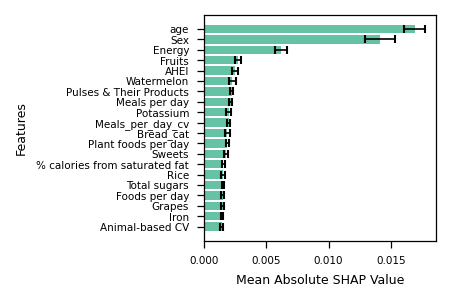

In [209]:

shap_data = process_mean_abs_shap(
    mean_abs_shap_df = mean_abs_shap_lgbm_pathways, 
    all_features = all_features, 
    top_n = 20,
    file_name= 'mean_abs_shap_lgbm_pathways' if not aggregate_features else 'mean_abs_shap_lgbm_pathways_aggregated_features'
    )

# shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=False)

In [141]:
# signed_mean_shap_lgbm_pathways = np.sign(mean_shap_lgbm_pathways)
# signed_mean_shap_lgbm_pathways

In [142]:
np.sign(correlation_matrix)

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0
1,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
2,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,...,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0
696,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0
697,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0
698,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0


In [143]:
def process_mean_signed_shap(mean_abs_shap_df, correlation_matrix, all_features, top_n=20):
    # Mean across microbes for each feature -> bar heights (unsigned)
    mean_abs_shap_df['mean_abs_shap'] = mean_abs_shap_df.mean(axis=1)

    # SEM across microbes for each feature -> error bars
    k = mean_abs_shap_df.shape[1] - 1  # exclude the new column
    sem_across = mean_abs_shap_df.drop(columns=['mean_abs_shap']).std(axis=1, ddof=1) / np.sqrt(k)

    # Signed direction from average correlation across microbes
    correlation_matrix['mean_corr'] = correlation_matrix.mean(axis=1)
    direction = np.sign(correlation_matrix['mean_corr']).reset_index(drop=True)

    # Directional mean absolute SHAP
    directional_abs_shap = mean_abs_shap_df['mean_abs_shap'] * direction

    # Full feature names
    feature_names = pd.Series(all_features)

    # Prepare full table (include SEM for convenience)
    shap_data_all = pd.DataFrame({
        'Feature': feature_names,
        'Directional Mean Absolute SHAP Value': directional_abs_shap.values,
        'SEM': sem_across.values
    })

    # Select top and bottom for plotting
    top_features = directional_abs_shap.sort_values(ascending=False).head(top_n)
    bottom_features = directional_abs_shap.sort_values(ascending=True).head(top_n)
    combined = pd.concat([top_features, bottom_features])

    # Plotting data
    shap_data_plot = shap_data_all.loc[combined.index]
    shap_data_plot = shap_data_plot.sort_values(by='Directional Mean Absolute SHAP Value')

    # Colors
    colors = ['cadetblue' if val > 0 else 'salmon'
              for val in shap_data_plot['Directional Mean Absolute SHAP Value']]

    # Plot with SEM error bars (symmetric around the signed mean)
    plt.figure(figsize=(8, 8), dpi=300)
    plt.barh(
        shap_data_plot['Feature'],
        shap_data_plot['Directional Mean Absolute SHAP Value'],
        xerr=shap_data_plot['SEM'],
        color=colors,
        edgecolor='none',
        error_kw=dict(capsize=3, lw=0.8, ecolor='black')
    )
    plt.xlabel('Signed Mean Absolute SHAP Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title('Top and Bottom Features by Directional SHAP Value', fontsize=16)
    plt.tight_layout()
    plt.show()

    return shap_data_all


/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


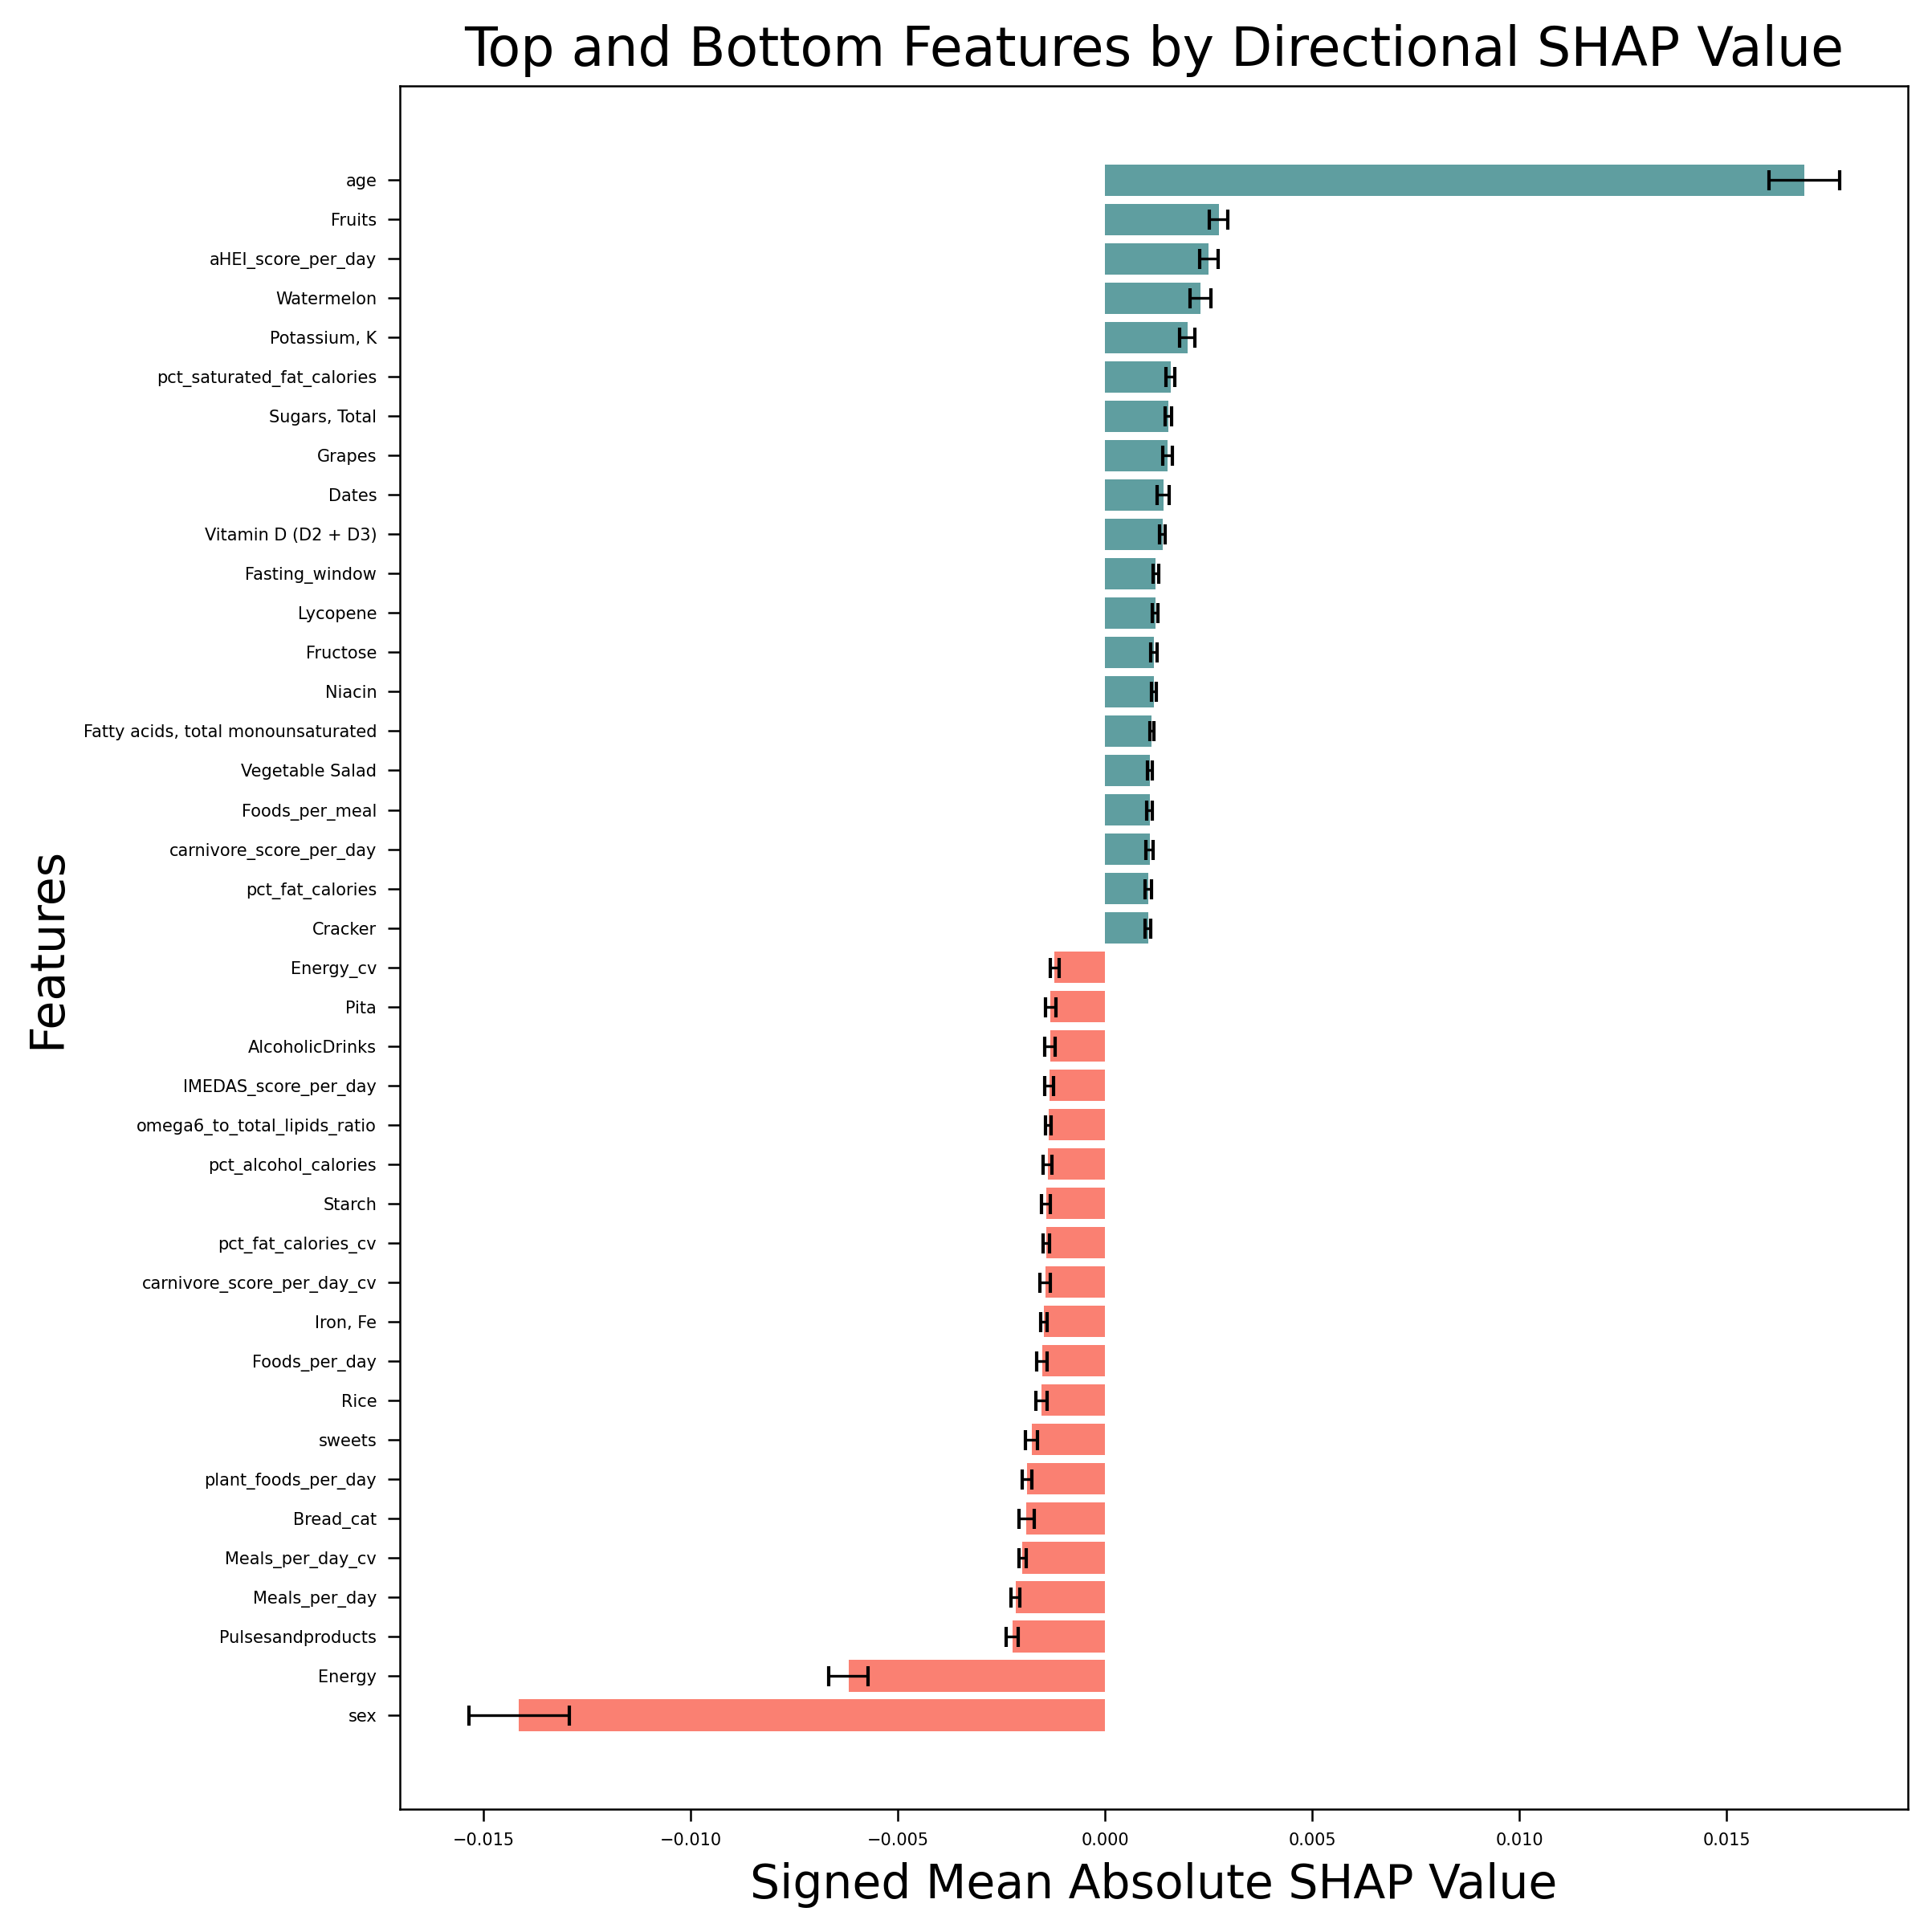

,Feature,Directional Mean Absolute SHAP Value,SEM
0,Acorn squash,0.000040,0.000007
1,Alfalfa sprouts,-0.000024,0.000003
2,Almond Beverage,0.000355,0.000022
3,Almond flour,0.000043,0.000008
4,Almond spread,-0.000040,0.000012
...,...,...,...
695,sweetmilkproducts,0.000288,0.000018
696,sweets,-0.001772,0.000140
697,age,0.016879,0.000846
698,sex,-0.014139,0.001215


In [144]:
process_mean_signed_shap(mean_abs_shap_lgbm_pathways, correlation_matrix, all_features, top_n=20)

#### Are there foods that especially impact certain microbes?

In [145]:
mean_abs_shap_lgbm_pathways['max'] = mean_abs_shap_lgbm_pathways.max(axis=1)
mean_abs_shap_lgbm_pathways['max_microbe'] = mean_abs_shap_lgbm_pathways.idxmax(axis=1)
mean_abs_shap_lgbm_pathways

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,mean_abs_shap,max,max_microbe
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000,0.000040,0.001351,1
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181,0.000024,0.000265,79
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189,0.000355,0.001945,135
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000,0.000043,0.001232,117
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000,0.000040,0.003470,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059,0.000288,0.002607,78
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280,0.001772,0.015368,316
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804,0.016879,0.040830,46
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077,0.014139,0.084629,310


In [146]:
max_microbes = mean_abs_shap_lgbm_pathways[mean_abs_shap_lgbm_pathways['max'] > 0.02]
features_of_max_microbes = max_microbes.index
max_microbes

,0,1,2,3,4,5,6,7,8,9,...,313,314,315,316,317,318,319,mean_abs_shap,max,max_microbe
97,0.000068,0.000076,0.000230,0.000015,0.000027,0.000218,0.000737,0.000644,0.001256,0.000137,...,0.000000,0.000008,0.000038,0.000034,0.000108,0.000293,0.000112,0.000322,0.030495,94
539,0.000048,0.000686,0.000569,0.000179,0.003896,0.000118,0.011432,0.009752,0.006793,0.001079,...,0.001028,0.001052,0.000158,0.000465,0.000129,0.000734,0.000685,0.002298,0.034455,41
570,0.015703,0.002919,0.000175,0.024880,0.002283,0.011267,0.003889,0.006019,0.013900,0.016055,...,0.000639,0.000471,0.009423,0.013236,0.003291,0.011836,0.026019,0.006189,0.032283,310
634,0.001467,0.001993,0.006094,0.001363,0.001217,0.016363,0.018604,0.014061,0.007741,0.005913,...,0.000920,0.000521,0.001016,0.002741,0.006814,0.001321,0.000823,0.002510,0.029265,20
667,0.001142,0.000509,0.001678,0.001520,0.000277,0.000571,0.008354,0.005354,0.006525,0.004744,...,0.000346,0.000225,0.000234,0.000295,0.001684,0.000424,0.010321,0.001891,0.022513,170
676,0.005399,0.000435,0.010817,0.003295,0.000644,0.012019,0.016644,0.015559,0.005622,0.015031,...,0.001142,0.000799,0.003751,0.000461,0.003070,0.005183,0.001374,0.002745,0.021930,276
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804,0.016879,0.040830,46
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077,0.014139,0.084629,310


In [147]:
fnames_of_max_microbes = pd.Series(all_features).loc[features_of_max_microbes]
fnames_of_max_microbes

97             Chia seeds
539            Watermelon
570                Energy
634    aHEI_score_per_day
667             Bread_cat
676                Fruits
697                   age
698                   sex
dtype: object

In [148]:
# specific_mic_dict = {}
# for f_index in features_of_max_microbes:
#     mic_index = max_microbes.loc[f_index, "max_microbe"]
#     print(mic_index)
#     specific_mic_dict[fnames_of_max_microbes[f_index]] = map_df.loc[int(mic_index)]["Microbe_Name"]
#     print(map_df.loc[int(mic_index)]["Microbe_Name"])
# specific_mic_dict


#### Predominant diet feature across microbes

In [149]:
# transpose so rows are microbes and cols are features?
# for each microbe, rank the features abs shap from 1 (highest) to 745 (lowest).
# For each feature, sum its rank across the microbes.
# Return the features with the lowest sum of rank.

In [150]:
mean_abs_shap_lgbm_pathways.drop(["max", "max_microbe", "mean_abs_shap"], axis=1, inplace=True)
mean_abs_shap_lgbm_pathways

/home/tomerse/.local/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000010,0.000000,0.000011,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000029,0.000440,0.000475,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000000,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000021,0.000000,0.000025,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000188,0.000650,0.000531,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.011342,0.000537,0.000721,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.002586,0.036594,0.037520,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.084629,0.000069,0.000046,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077


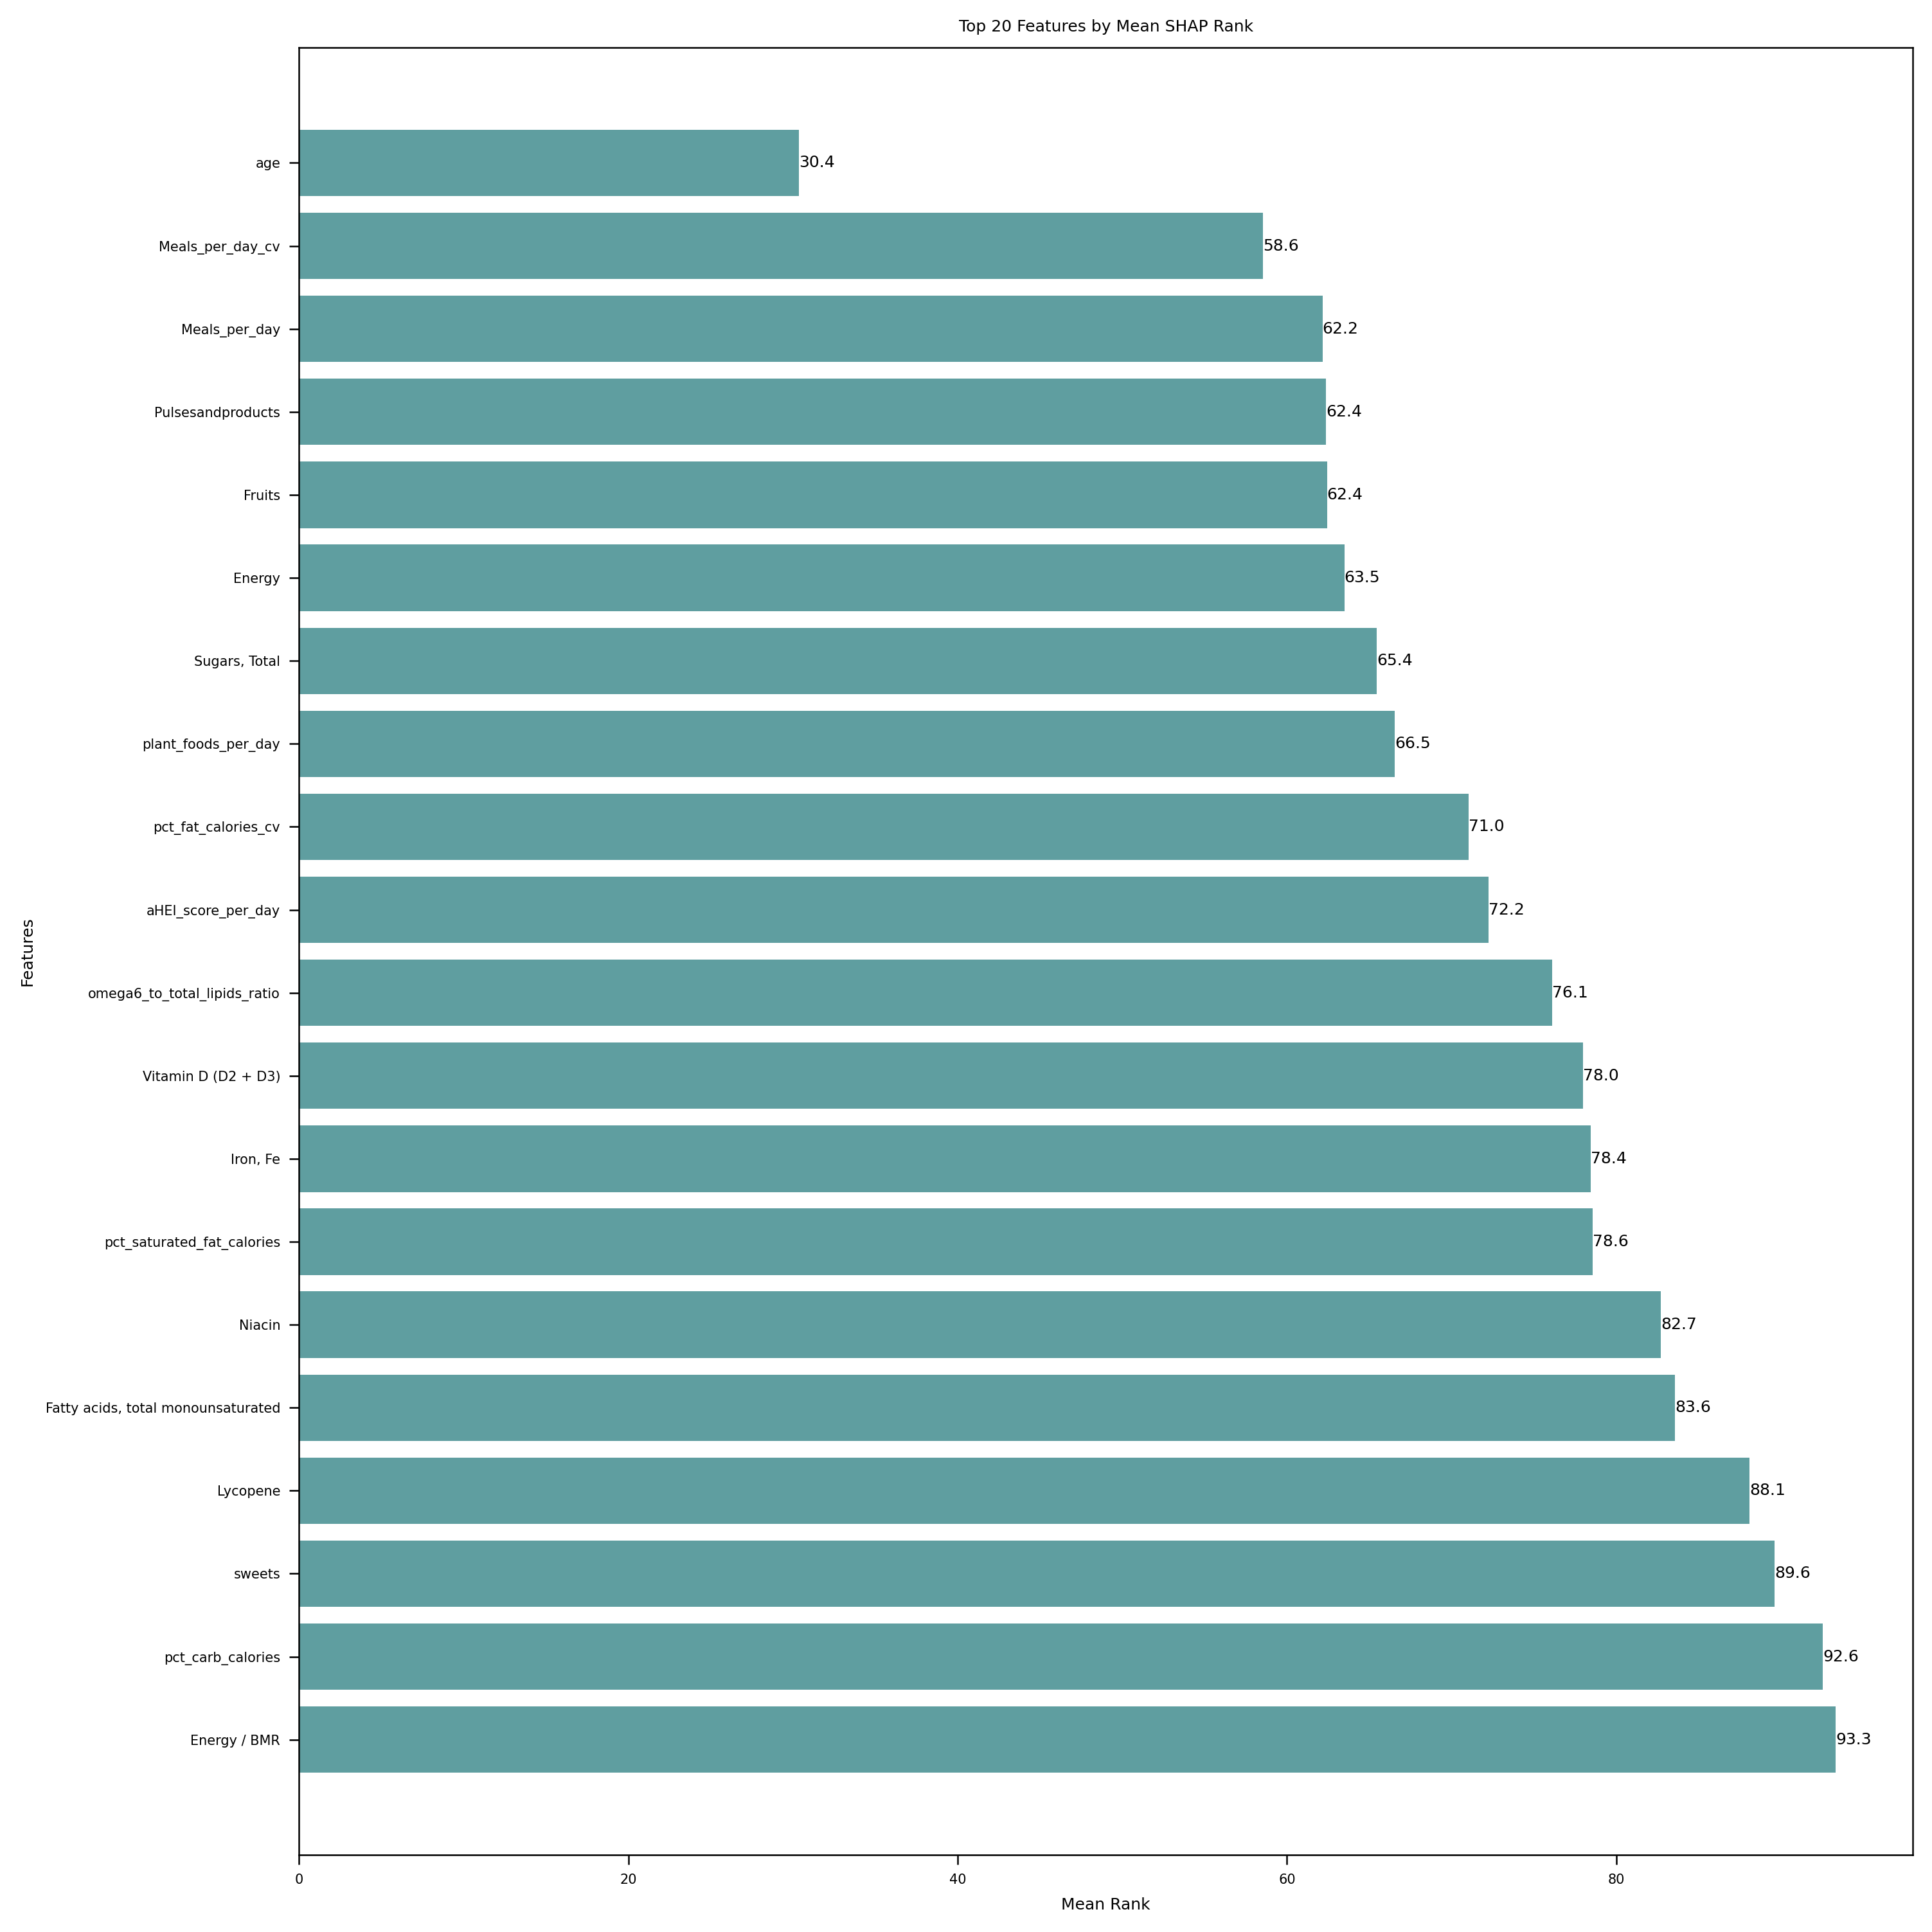

In [151]:
def analyze_shap_ranks(df, all_features, top_n=20):
    """
    Analyze mean absolute SHAP values and create rank visualization.
    
    Parameters:
    df (pd.DataFrame): DataFrame with features as rows and targets as columns
    all_features (pd.Series): Series containing feature names
    top_n (int): Number of top features to display
    
    Returns:
    tuple: (mean_ranks DataFrame, figure)
    """
    # Calculate ranks for each target (column)
    # Higher SHAP values should have lower ranks (rank 1 is highest)
    ranks = df.rank(ascending=False)
    
    # Calculate mean rank across all targets for each feature
    mean_ranks = ranks.mean(axis=1)
    
    # Get top N features by mean rank
    top_features = mean_ranks.sort_values().head(top_n)
    
    # Get actual feature names
    feature_names = pd.Series(all_features).loc[top_features.index]
    
    # Sort features by rank (highest to lowest)
    sorted_indices = np.argsort(top_features.values)[::-1]
    sorted_features = feature_names.iloc[sorted_indices]
    sorted_values = top_features.values[sorted_indices]
    
    # Create visualization
    plt.figure(figsize=(10, 10), dpi=300)
    
    # Create horizontal bar plot with sorted values
    bars = plt.barh(
        y=np.arange(len(sorted_features)),
        width=sorted_values,
        color='cadetblue',
        edgecolor=None
    )
    
    # Customize the plot
    plt.ylabel('Features')
    plt.xlabel('Mean Rank')
    plt.title(f'Top {top_n} Features by Mean SHAP Rank')
    
    # Add feature names as y-tick labels
    plt.yticks(np.arange(len(sorted_features)), sorted_features)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}',
                ha='left', va='center')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Create summary DataFrame with actual feature names
    summary_df = pd.DataFrame({
        'Feature': feature_names,
        'Mean_Rank': top_features.values,
        'Std_Rank': ranks.loc[top_features.index].std(axis=1),
        'Min_Rank': ranks.loc[top_features.index].min(axis=1),
        'Max_Rank': ranks.loc[top_features.index].max(axis=1)
    })
    
    # Sort summary DataFrame to match plot order
    summary_df = summary_df.iloc[sorted_indices]

    # Save the figure
    # plt.savefig(home_path + f"figures/{PROBLEM}/pathways/mean_shap_ranks{aggregation}.png", 
    #             dpi=300, facecolor="white", transparent=False, bbox_inches='tight')

    # Show the plot
    plt.show()
    
    return summary_df

summary_df = analyze_shap_ranks(mean_abs_shap_lgbm_pathways, all_features, top_n=20)

#### What are the SHAP values for the highly correlated microbes?

Summary plots are done in "SHAP_summary_plot.py"

In [152]:
# for microbe_index in top_microbes.index:
#     top_coefs = mean_abs_shap_lgbm_pathways.iloc[:,microbe_index].sort_values(ascending=False)[0:20]
#     top_fnames = pd.Series(lgbm_diet_fnames[0]).loc[top_coefs.index]
#     to_plot = pd.DataFrame(top_coefs).set_index(top_fnames)
#     to_plot.columns = ['']
#     print(to_plot)
#     to_plot.plot.barh()
#     plt.title("What dietary features predict the highly correlated microbes?")
#     plt.legend().remove()
#     # plt.xticks(rotation=90)
#     plt.savefig("top_microbes_features_freq.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
#     plt.show()
#     plt.clf()

### Microbes with one extreme feature
The first shap value is at least twice the second shap value.

In [153]:
mean_abs_shap_lgbm_pathways

,0,1,2,3,4,5,6,7,8,9,...,310,311,312,313,314,315,316,317,318,319
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000032,0.000000,0.000000,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000010,0.000000,0.000011,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000029,0.000440,0.000475,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000000,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000021,0.000000,0.000025,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000188,0.000650,0.000531,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.011342,0.000537,0.000721,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.002586,0.036594,0.037520,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.084629,0.000069,0.000046,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077


In [154]:
mean_abs_shap_lgbm_pathways_transposed = mean_abs_shap_lgbm_pathways.transpose()

def first_second_ratio(row):
    sorted_row = row.sort_values(ascending=False)
    return sorted_row.iloc[0] >= 10 * sorted_row.iloc[1]

mic_with_extreme_feature = mean_abs_shap_lgbm_pathways_transposed[mean_abs_shap_lgbm_pathways_transposed.apply(first_second_ratio, axis=1)]
mic_with_extreme_feature


,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
74,0.0,0.0,0.000536,0.000015,0.000015,0.000462,0.000000,0.000437,0.000126,0.000006,...,0.000056,0.000333,0.000134,0.000155,0.000494,0.000327,0.000434,0.038571,0.000030,0.000345
81,0.0,0.0,0.001148,0.000034,0.000000,0.000185,0.000006,0.000371,0.000043,0.000038,...,0.000039,0.000372,0.000111,0.000237,0.000473,0.000231,0.000531,0.039618,0.000043,0.000858
124,0.0,0.0,0.000725,0.000000,0.000000,0.000419,0.000005,0.000470,0.000015,0.000007,...,0.000050,0.000313,0.000095,0.000216,0.000290,0.000232,0.000727,0.038598,0.000037,0.000995


In [155]:
# print(mic_with_extreme_feature.iloc[:, 314])
# print("The extreme mean shap value:", mic_with_extreme_feature.max(axis=1))
# print("The extreme feature index:", mic_with_extreme_feature.idxmax(axis=1))
# print("The extreme feature:", pd.Series(all_features).loc[mic_with_extreme_feature.idxmax(axis=1)])
# print("The pathway:", significant_targets[314])

### Groups analysis


In [156]:
pd.Series(significant_targets)

0       1CMET2-PWY: folate transformations III (E. coli)
1      ALLANTOINDEG-PWY: superpathway of allantoin de...
2              ANAEROFRUCAT-PWY: homolactic fermentation
3       ANAGLYCOLYSIS-PWY: glycolysis III (from glucose)
4      ARG+POLYAMINE-SYN: superpathway of arginine an...
                             ...                        
308    THISYNARA-PWY: superpathway of thiamine diphos...
309    THRESYN-PWY: superpathway of L-threonine biosy...
310                     TRNA-CHARGING-PWY: tRNA charging
311    UDPNAGSYN-PWY: UDP-N-acetyl-D-glucosamine bios...
312                    VALSYN-PWY: L-valine biosynthesis
Length: 313, dtype: object

In [157]:
map_df

,Pearson Correlation,targets
310,0.251534,SER-GLYSYN-PWY: superpathway of L-serine and g...
152,0.239180,PWY-6121: 5-aminoimidazole ribonucleotide bios...
172,0.231900,PWY-6385: peptidoglycan biosynthesis III (myco...
231,0.228448,"PWY-7237: myo-, chiro- and scyllo-inositol deg..."
57,0.228161,HISDEG-PWY: L-histidine degradation I
...,...,...
187,0.027627,PWY-6607: guanosine nucleotides degradation I
176,0.027544,PWY-6478: GDP-D-glycero-&alpha;-D-manno-heptos...
220,0.026824,PWY-7200: superpathway of pyrimidine deoxyribo...
158,0.026762,PWY-6143: CMP-pseudaminate biosynthesis


In [240]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def analyze_group(group, title=None, directional=False, save=False):
    plt.style.use(third_style)
    if title is None:
        title = group

    # --- resolve group indices ---
    group_indices = map_df[map_df["targets"].str.contains(group, case=False, regex=True)].index
    for group_index in group_indices:
        print(map_df.loc[int(group_index)]["targets"])

    corr = lgbm_diet_scores.loc[group_indices]
    print(corr)

    group_indices = [str(x) for x in group_indices]

    mean_abs_shap_group = mean_abs_shap_lgbm_pathways.loc[:, group_indices]
    corr_matrix_group = correlation_matrix.loc[:, group_indices]

    mean_abs_shap_group['mean_abs_shap'] = mean_abs_shap_group.mean(axis=1)

    # unified scatter style
    dot_color = '0.2'   # dark gray
    dot_alpha = 0.35

    # --- helper to map feature names ---
    def pretty_labels(index_like):
        idx = pd.Index(index_like)
        def _to_int_if_possible(x):
            try:
                return int(x)
            except (ValueError, TypeError):
                return x
        idx_int = idx.map(_to_int_if_possible)
        base_names = pd.Series(all_features)
        mapped = base_names.reindex(idx_int)
        pretty = [diet_rename_dict.get(str(name), diet_rename_dict.get(name, str(name))) for name in mapped.values]
        return pretty

    if directional:
        corr_matrix_group['mean_corr'] = corr_matrix_group.mean(axis=1)
        direction = np.sign(corr_matrix_group['mean_corr']).reset_index(drop=True)
        directional_abs_shap = mean_abs_shap_group['mean_abs_shap'] * direction

        top_n = 10
        top_features = directional_abs_shap.sort_values(ascending=False).head(top_n)
        bottom_features = directional_abs_shap.sort_values(ascending=True).head(top_n)
        combined = pd.concat([top_features, bottom_features])

        shap_data = pd.DataFrame({
            'Feature': pretty_labels(combined.index),  # <--- renamed using diet_rename_dict
            'Directional SHAP Value': combined.values
        }, index=combined.index)

        shap_data = shap_data.sort_values(by='Directional SHAP Value')

        # --- coolwarm normalized colors ---
        norm = mcolors.Normalize(vmin=-abs(shap_data['Directional SHAP Value']).max(),
                                 vmax=abs(shap_data['Directional SHAP Value']).max())
        cmap = cm.get_cmap("coolwarm")
        colors = [cmap(norm(val)) for val in shap_data['Directional SHAP Value']]

        plt.figure()
        plt.barh(shap_data['Feature'], shap_data['Directional SHAP Value'],
                 color=colors, edgecolor='none')

        # scatter - same color for all dots
        vals = mean_abs_shap_group.drop(columns=['mean_abs_shap'])
        signed_vals = vals.mul(direction, axis=0).loc[shap_data.index]
        y = np.arange(len(shap_data))
        for col in signed_vals.columns:
            plt.scatter(
                signed_vals[col].values, y,
                s=2, zorder=3, color=dot_color, alpha=dot_alpha, edgecolors='none'
            )

        plt.xlabel('Signed Mean SHAP Value')
        plt.ylabel('Features')

    else:
        top_shap_group = mean_abs_shap_group['mean_abs_shap'].sort_values(ascending=False).head(10).index

        shap_data = pd.DataFrame({
            'Feature': pretty_labels(top_shap_group),  # <--- renamed using diet_rename_dict
            'Mean Absolute SHAP Value': mean_abs_shap_group['mean_abs_shap'].loc[top_shap_group].values
        }, index=top_shap_group)

        shap_data = shap_data.sort_values(by='Mean Absolute SHAP Value', ascending=True)

        plt.figure()
        plt.barh(shap_data['Feature'], shap_data['Mean Absolute SHAP Value'],
                 color='cadetblue', edgecolor='none')

        # scatter - same color for all dots
        vals = mean_abs_shap_group.drop(columns=['mean_abs_shap']).loc[top_shap_group]
        vals = vals.loc[shap_data.index]
        y = np.arange(len(shap_data))
        for col in vals.columns:
            plt.scatter(
                vals[col].values, y,
                s=2, zorder=3, color=dot_color, alpha=dot_alpha, edgecolors='none'
            )

        plt.xlabel('Mean Absolute SHAP Value')
        plt.ylabel('Features')
        plt.title(f"Top Features for {title}")
        plt.tight_layout()

    if save:
        plt.savefig(f"{home_path}figures/{PROBLEM}/pathways/group_{title}_mean_abs_shap{aggregation}.png",
                    dpi=400, facecolor="white", transparent=False, bbox_inches='tight')
        plt.savefig(f"{home_path}figures/{PROBLEM}/pathways/group_{title}_mean_abs_shap{aggregation}.pdf",
                    dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf')
    plt.show()


In [241]:
def analyze_group_ranks(group, title=None):
    if title is None:
        title = group

    group_indices = map_df[map_df["targets"].str.contains(group, case=False, regex=True)].index
    for group_index in group_indices:
        print(map_df.loc[int(group_index)]["targets"])

    # Pearson's correlations
    corr = lgbm_diet_scores.loc[group_indices]
    print(corr)

    group_indices = [str(x) for x in group_indices]
    shap_values_group = mean_abs_shap_lgbm_pathways.loc[:, list(group_indices)]

    # Calculate ranks for each target (column)
    ranks = shap_values_group.rank(ascending=False)
    
    # Calculate mean rank across all targets for each feature
    mean_ranks = ranks.mean(axis=1)
    
    # Get top 10 features by mean rank
    top_features = mean_ranks.sort_values().head(10)
    
    # Get actual feature names
    top_fnames_shap_group = pd.Series(all_features).loc[top_features.index]
    
    # Sort features by rank (highest to lowest)
    sorted_indices = np.argsort(top_features.values)[::-1]
    sorted_features = top_fnames_shap_group.iloc[sorted_indices]
    sorted_values = top_features.values[sorted_indices]
    
    # Create visualization
    plt.figure(figsize=(10, 6))
    bars = plt.barh(
        y=np.arange(len(sorted_features)),
        width=sorted_values,
        color='cadetblue',
        edgecolor=None
    )
    
    # Customize the plot
    plt.ylabel('Features')
    plt.xlabel('Mean Rank')
    plt.title(f'Mean SHAP Rank for {title}')
    
    # Add feature names as y-tick labels
    plt.yticks(np.arange(len(sorted_features)), sorted_features)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2,
                 f'{width:.1f}',
                 ha='left', va='center')
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Save the figure
    # plt.savefig(home_path + f"figures/{PROBLEM}/pathways/mean_shap_ranks_{title}.png", 
    #             dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    
    # Show the plot
    plt.show()
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Feature': sorted_features.values,
        'Mean_Rank': sorted_values,
        'Std_Rank': ranks.loc[top_features.index].std(axis=1).values,
        'Min_Rank': ranks.loc[top_features.index].min(axis=1).values,
        'Max_Rank': ranks.loc[top_features.index].max(axis=1).values
    })
    
    return summary_df


PWY-7199: pyrimidine deoxyribonucleosides salvage
PWY-7282: 4-amino-2-methyl-5-diphosphomethylpyrimidine biosynthesis II
PWY0-166: superpathway of pyrimidine deoxyribonucleotides de novo biosynthesis (E. coli)
PWY-7208: superpathway of pyrimidine nucleobases salvage
PWY-7197: pyrimidine deoxyribonucleotide phosphorylation
PWY0-1298: superpathway of pyrimidine deoxyribonucleosides degradation
PWY-7187: pyrimidine deoxyribonucleotides de novo biosynthesis II
PWY-7184: pyrimidine deoxyribonucleotides de novo biosynthesis I
PWY0-162: superpathway of pyrimidine ribonucleotides de novo biosynthesis
PWY-6545: pyrimidine deoxyribonucleotides de novo biosynthesis III
PWY-7210: pyrimidine deoxyribonucleotides biosynthesis from CTP
PWY-7198: pyrimidine deoxyribonucleotides de novo biosynthesis IV
PWY-7211: superpathway of pyrimidine deoxyribonucleotides de novo biosynthesis
PWY-7200: superpathway of pyrimidine deoxyribonucleoside salvage
219    0.163312
236    0.159950
287    0.099221
222    0.09

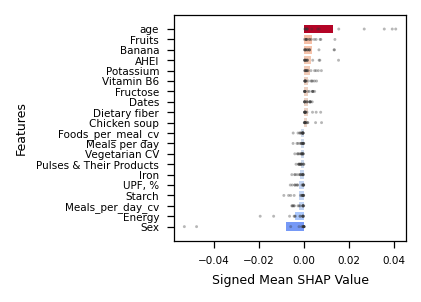

In [242]:
analyze_group("Pyrimidine", directional=True)

P124-PWY: Bifidobacterium shunt
76    0.09587
Name: 0, dtype: float64


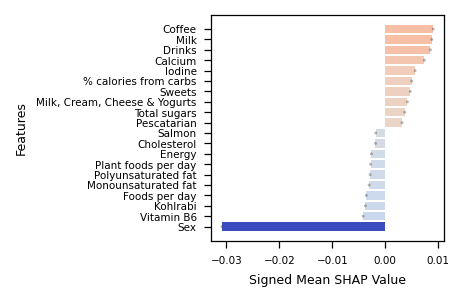

In [243]:
analyze_group("Bifido", directional=True)

PWY-6317: D-galactose degradation I (Leloir pathway)
LACTOSECAT-PWY: lactose and galactose degradation I
170    0.191911
63     0.162710
Name: 0, dtype: float64


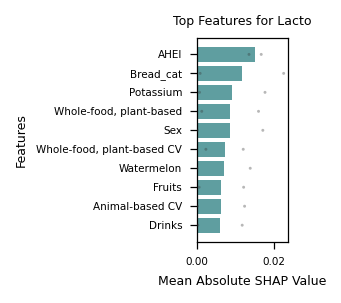

In [244]:
analyze_group("Lacto", directional=False)

COMPLETE-ARO-PWY: superpathway of aromatic amino acid biosynthesis
PWY0-1296: purine ribonucleosides degradation
ARGSYN-PWY: L-arginine biosynthesis I (via L-ornithine)
PWY-6292: superpathway of L-cysteine biosynthesis (mammalian)
1CMET2-PWY: folate transformations III (E. coli)
PWY-841: superpathway of purine nucleotides de novo biosynthesis I
20     0.208432
276    0.205673
6      0.195032
168    0.140728
0      0.135151
270    0.125579
Name: 0, dtype: float64


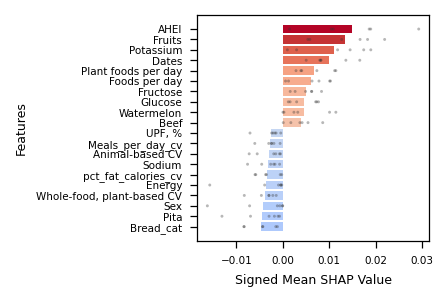

In [245]:
regex = r'COMPLETE-ARO-PWY|ARGSYN-PWY|PWY-841|PWY0-1296|1CMET2-PWY|PWY-6292'


analyze_group(regex,
              title="Biosynthesis",
              directional=True,
              save=True)

PWY-6317: D-galactose degradation I (Leloir pathway)
GALACTUROCAT-PWY: D-galacturonate degradation I
PWY-6507: 4-deoxy-L-threo-hex-4-enopyranuronate degradation
LACTOSECAT-PWY: lactose and galactose degradation I
PWY-7242: D-fructuronate degradation
GLUCUROCAT-PWY: superpathway of &beta;-D-glucuronosides degradation
PWY-6527: stachyose degradation
GALACT-GLUCUROCAT-PWY: superpathway of hexuronide and hexuronate degradation
170    0.191911
35     0.180150
177    0.167838
63     0.162710
233    0.154519
41     0.151924
179    0.145605
32     0.134168
Name: 0, dtype: float64


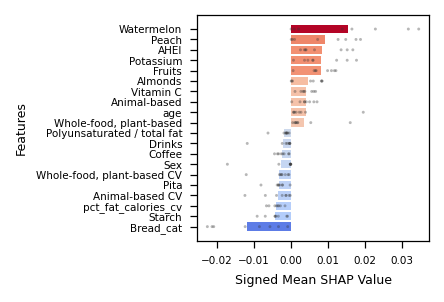

In [246]:
regex = r'PWY-6317|LACTOSECAT-PWY|PWY-6527|GLUCUROCAT-PWY|GALACTUROCAT-PWY|PWY-7242|PWY-6507'

analyze_group(regex,
              title="Carbohydrate_and_plant-polysaccharide_degradation",
              directional=True,
              save=True)

PWY-6936: seleno-amino acid biosynthesis (plants)
PWY-101: photosynthesis light reactions
204    0.177044
94     0.153331
Name: 0, dtype: float64


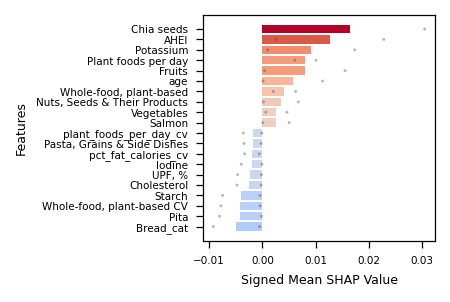

In [247]:
regex = r'PWY-101|PWY-6936'

analyze_group(regex,
              title="Plant_pathways",
              directional=True,
              save=True)

PWY-5676: acetyl-CoA fermentation to butanoate II
CENTFERM-PWY: pyruvate fermentation to butanoate
129    0.093961
14     0.066626
Name: 0, dtype: float64


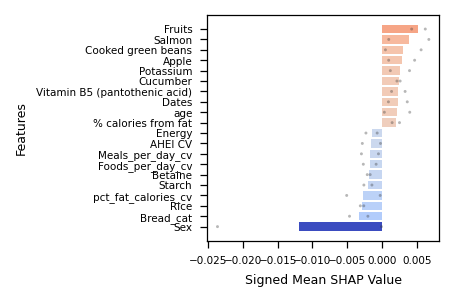

In [248]:
butyrate_regex = r'CENTFERM-PWY|PWY-5676'#|PWY-6590'

analyze_group(butyrate_regex,
              title="Butyrate",
              directional=True,
              save=True)

P461-PWY: hexitol fermentation to lactate, formate, ethanol and acetate
P41-PWY: pyruvate fermentation to acetate and (S)-lactate I
PWY-5100: pyruvate fermentation to acetate and lactate II
85     0.081313
82     0.068650
108    0.066459
Name: 0, dtype: float64


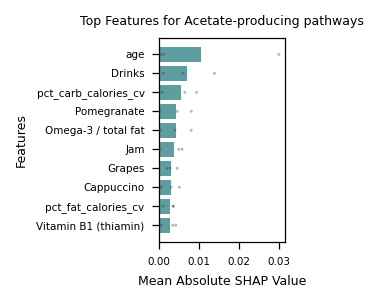

In [249]:
# 1. Acetate‐producing pathways
#   - P41-PWY: pyruvate fermentation to acetate and (S)-lactate I
#   - PWY-5100: pyruvate fermentation to acetate and lactate II
#   - P461-PWY: hexitol fermentation to lactate, formate, ethanol and acetate
acetate_regex = r'P41-PWY|PWY-5100|P461-PWY'
analyze_group(acetate_regex, title="Acetate-producing pathways")

COA-PWY: coenzyme A biosynthesis I (prokaryotic)
TCA: TCA cycle I (prokaryotic)
HCAMHPDEG-PWY: 3-phenylpropanoate and 3-(3-hydroxyphenyl)propanoate degradation to 2-hydroxypentadienoate
PWY0-1277: 3-phenylpropanoate and 3-(3-hydroxyphenyl)propanoate degradation
PWY-7269: mitochondrial NADPH production (yeast)
PWY0-1479: tRNA processing
GOLPDLCAT-PWY: superpathway of glycerol degradation to 1,3-propanediol
PWY-7013: (S)-propane-1,2-diol degradation
17     0.097089
314    0.086794
52     0.072744
275    0.071518
235    0.065475
284    0.059433
51     0.039753
208    0.034527
Name: 0, dtype: float64


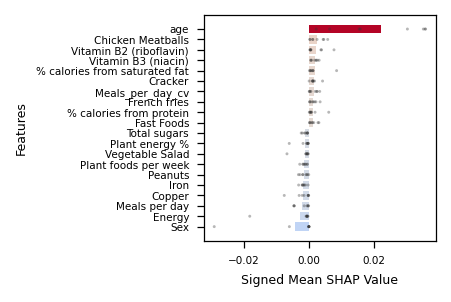

In [250]:
# 2. Propionate‐producing pathways
#   - P108-PWY: pyruvate fermentation to propanoate I
propionate_regex = r'Pro'
analyze_group(propionate_regex, title="Propionate-producing pathways", directional=True)

PWY-5676: acetyl-CoA fermentation to butanoate II
P461-PWY: hexitol fermentation to lactate, formate, ethanol and acetate
PWY-6590: superpathway of Clostridium acetobutylicum acidogenic fermentation
P41-PWY: pyruvate fermentation to acetate and (S)-lactate I
CENTFERM-PWY: pyruvate fermentation to butanoate
PWY-5100: pyruvate fermentation to acetate and lactate II
129    0.093961
85     0.081313
185    0.071755
82     0.068650
14     0.066626
108    0.066459
Name: 0, dtype: float64


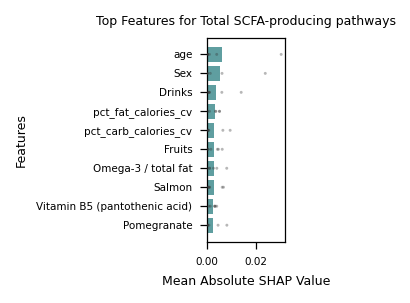

In [251]:
# 3. Total SCFA‐producing pathways
#    combine acetate (above), propionate (above) and butyrate (CENTFERM-PWY, PWY-5676, PWY-6590)
scfa_regex = r'P41-PWY|PWY-5100|P461-PWY|P108-PWY|CENTFERM-PWY|PWY-5676|PWY-6590'
analyze_group(scfa_regex, title="Total SCFA-producing pathways")

### Noam's Plots - Finding Main Predictors

In [252]:
mean_abs_shap_lgbm_pathways

,0,1,2,3,4,5,6,7,8,9,...,311,312,313,314,315,316,317,318,319,mean_abs_shap
0,0.000000,0.001351,0.000000,0.000000,0.000000,0.000030,0.000000,0.000008,0.000021,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000013,0.000018,0.000000,0.000010,0.000000,0.000040
1,0.000008,0.000000,0.000018,0.000000,0.000000,0.000014,0.000000,0.000006,0.000000,0.000103,...,0.000000,0.000011,0.000000,0.000004,0.000000,0.000031,0.000068,0.000019,0.000181,0.000024
2,0.000032,0.000129,0.000246,0.000018,0.000293,0.000063,0.000049,0.000025,0.000076,0.000135,...,0.000440,0.000475,0.000631,0.000401,0.000064,0.000060,0.000075,0.000061,0.000189,0.000355
3,0.000000,0.000000,0.000073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000022,...,0.000227,0.000246,0.000036,0.000058,0.000000,0.000000,0.000006,0.000006,0.000000,0.000043
4,0.000032,0.000006,0.000047,0.000089,0.000007,0.000011,0.000012,0.000000,0.000000,0.000012,...,0.000000,0.000025,0.000000,0.000000,0.000025,0.000016,0.000367,0.000087,0.000000,0.000040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.000258,0.000610,0.000202,0.001010,0.000194,0.000210,0.000127,0.000235,0.000087,0.000182,...,0.000650,0.000531,0.000143,0.000090,0.000226,0.000822,0.000030,0.000083,0.000059,0.000288
696,0.003303,0.000278,0.000473,0.007791,0.000436,0.003627,0.001328,0.001196,0.004358,0.000951,...,0.000537,0.000721,0.000548,0.000428,0.007160,0.015368,0.002194,0.001566,0.003280,0.001772
697,0.001046,0.007738,0.004842,0.003123,0.038508,0.003020,0.000841,0.000741,0.000790,0.003843,...,0.036594,0.037520,0.037059,0.035677,0.004403,0.000497,0.001977,0.002007,0.003804,0.016879
698,0.007129,0.000261,0.000228,0.053183,0.000050,0.035359,0.016219,0.033460,0.044700,0.059520,...,0.000069,0.000046,0.000000,0.000012,0.031001,0.048279,0.002720,0.014874,0.061077,0.014139


In [253]:
lgbm_diet_scores.sort_values(ascending=False).head(30)

310    0.251534
152    0.239180
172    0.231900
231    0.228448
57     0.228161
232    0.218177
319    0.214633
61     0.212333
154    0.210643
155    0.210631
160    0.208855
20     0.208432
276    0.205673
109    0.204740
251    0.203072
173    0.201959
149    0.201627
9      0.201476
95     0.201417
89     0.201179
226    0.200266
174    0.199531
45     0.198785
262    0.197625
6      0.195032
7      0.194656
70     0.194015
106    0.193518
261    0.193432
170    0.191911
Name: 0, dtype: float64

In [254]:
# def main_predictors_heatmap(mean_abs_df, cluster=False):  
#     # Step 1: Extract the indices of the top 100 highest correlated microbes
#     top_100_indices = predictive_gains.sort_values(ascending=False)
#     top_100_indices = top_100_indices.head(100).index
#     print("Top 100 indices from lgbm_diet_scores:", top_100_indices)

#     # Step 2: Subset mean_abs_shap using these indices
#     # mean_abs_shap_top_100 = mean_abs_shap_lgbm_pathways.iloc[top_100_indices]
#     top_100_indices_str = [str(i) for i in top_100_indices]
#     mean_abs_shap_top_100 = mean_abs_df[top_100_indices_str]
#     print("Subset of mean_abs_shap using top 100 indices:\n", mean_abs_shap_top_100)

#     # selected_columns = (
#     #     mean_abs_shap_lgbm_pathways.max().nlargest(100).index
#     # )

#     # # Creating a new DataFrame with the selected columns
#     # mean_abs_shap_top_100 = mean_abs_shap_lgbm_pathways[selected_columns]
#     # print("Subset of mean_abs_shap using 100 microbes with highest max shap:\n", mean_abs_shap_top_100)

#     # Step 3: Identify the 30 features with the highest maximum mean_abs_shap values
#     # top_30_features = mean_abs_shap_lgbm_pathways.max().nlargest(30).index
#     top_30_features = mean_abs_shap_top_100.max(axis=1).nlargest(30).index
#     print("Top 30 features with highest max mean_abs_shap values:", top_30_features)

#     # Step 4: Subset the DataFrame to include only the selected features
#     # heatmap_data = mean_abs_shap_top_100[top_30_features]
#     heatmap_data = mean_abs_shap_top_100.iloc[top_30_features]
#     print("Final heatmap data shape:", heatmap_data.shape)
#     print("Sample of heatmap data:\n", heatmap_data.head())

#     percentile_99 = heatmap_data.quantile(0.99).max()
#     percentile_1 = heatmap_data.quantile(0.01).min()
#     print("99th percentile value:", percentile_99)
#     print("1st percentile value:", percentile_1)


#     # Step 5: Rename the axis labels
#     heatmap_data = heatmap_data.T
#     # Replace x-axis (columns) with corresponding feature names
#     heatmap_data.columns = [all_features[int(i)] for i in top_30_features]

#     # Replace y-axis (rows) with corresponding target names
#     heatmap_data.index = [targets[int(i)] for i in top_100_indices]

#     print("Updated column labels (features):", heatmap_data.columns.tolist())
#     print("Updated row labels (targets):", heatmap_data.index.tolist())

#     # Step 6: Plot the heatmap
#     # Define a threshold below which values are considered "gray" and should be white
#     zero_threshold = 0.01  # you can increase this to 1e-3 or 1e-2 if your values are small

#     # Create a mask for values below the threshold
#     mask = heatmap_data.abs() < zero_threshold

#     # Plot with mask
#     if cluster:
#         plt.figure(figsize=(16, 30))
#         sns.clustermap(
#             heatmap_data,
#             cmap="coolwarm",
#             annot=False,
#             vmax=percentile_99,
#             vmin=percentile_1,
#             mask=mask,
#             cbar=True,
#             # linewidths=0.5,
#             # linecolor='lightgray'
#         )
#     else:
#         plt.figure(figsize=(12, 20))
#         sns.heatmap(
#             heatmap_data,
#             cmap="coolwarm",
#             annot=False,
#             vmax=percentile_99,
#             vmin=percentile_1,
#             mask=mask,
#             cbar=True,
#             # linewidths=0.5,
#             # linecolor='lightgray'
#         )
#     plt.title("Top 100 Correlated Microbes vs. Top 30 Features Heatmap")
#     plt.xlabel("Features")
#     plt.ylabel("Microbes")
#     plt.savefig(home_path + f"figures/{PROBLEM}/pathways/shap_main_predictors_mean_abs{aggregation}_pathways.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
#     plt.show()


# if aggregate_features:
#     mean_abs_df = mean_abs_shap_lgbm_pathways_agg
# else:
#     # mean_abs_df = mean_abs_shap_lgbm_pathways
#     mean_abs_df = signed_mean_abs_shap


# main_predictors_heatmap(mean_abs_df, cluster=False)


Top 100 indices from lgbm_diet_scores: Int64Index([ 20,  94, 170, 276,  41, 177, 204, 233,  35, 270,   6,   0, 168,
            179,  63, 222, 217, 234, 241, 101,  36, 300, 254,  49,  45,   7,
              5,  60, 195,  43,   2,  57, 266, 190, 121, 237,  82, 272, 249,
            268, 189, 106, 197, 182,  32, 232, 285, 262, 305, 110],
           dtype='int64')
Subset of mean_abs_shap using top 100 indices:
            20        94       170       276        41       177       204  \
0    0.000011  0.000000  0.000061  0.000020  0.000000  0.000032  0.000304   
1    0.000000  0.000058  0.000021  0.000015  0.000008  0.000007  0.000000   
2    0.000064  0.000136  0.000243  0.000026  0.000269  0.000039  0.000031   
3   -0.000000  0.000032  0.000007  0.000000 -0.000000  0.000000  0.000006   
4    0.000010  0.000278  0.000000  0.000035  0.000008  0.000019  0.000008   
..        ...       ...       ...       ...       ...       ...       ...   
695 -0.000611 -0.000162 -0.000413 -0.000155  0.00

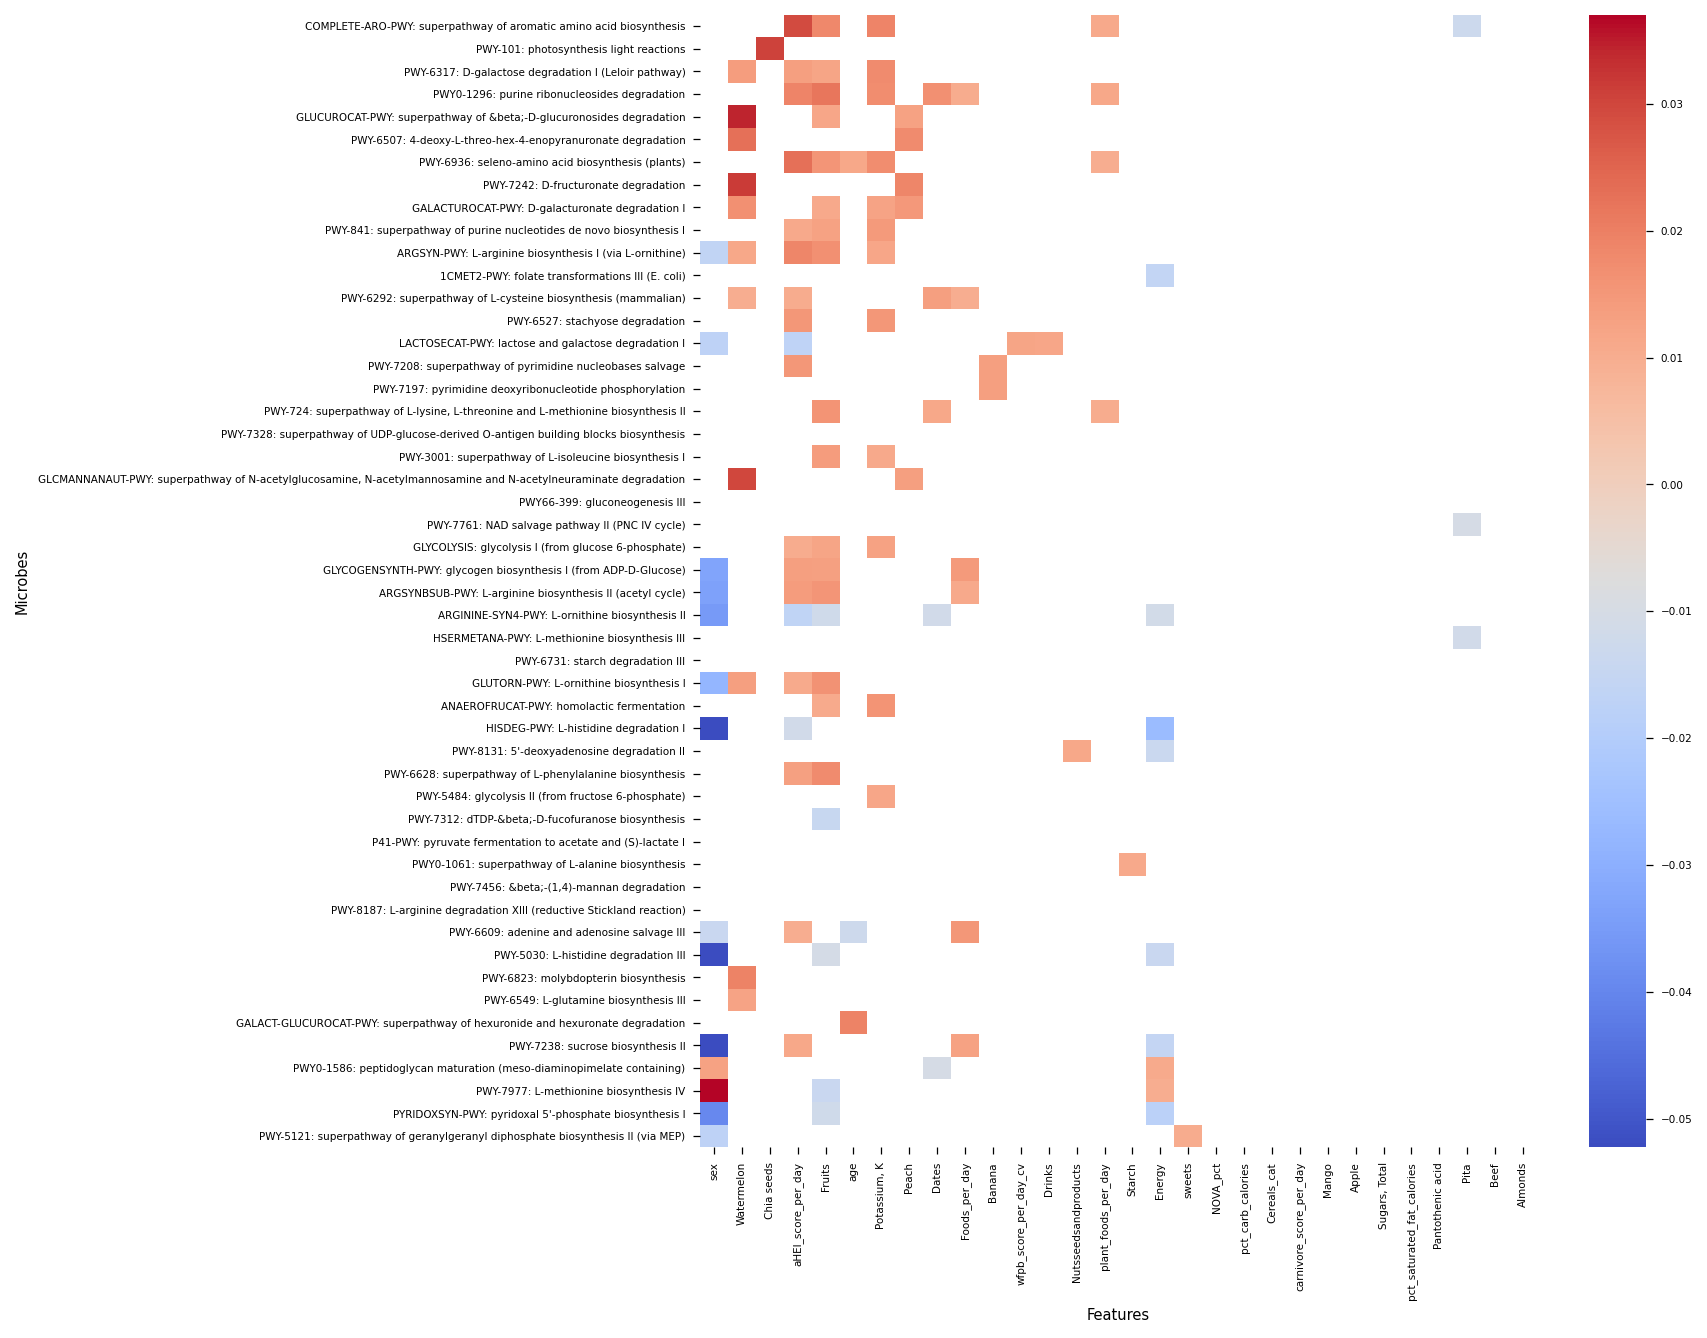

In [255]:
# Version formatted for the paper
def main_predictors_heatmap(mean_abs_df, cluster=False):  
    # Step 1: Extract the indices of the top 100 highest correlated microbes
    top_100_indices = predictive_gains.sort_values(ascending=False)
    top_100_indices = top_100_indices.head(50).index
    print("Top 100 indices from lgbm_diet_scores:", top_100_indices)

    # Step 2: Subset mean_abs_shap using these indices
    # mean_abs_shap_top_100 = mean_abs_shap_lgbm_abundance.iloc[top_100_indices]
    top_100_indices_str = [str(i) for i in top_100_indices]
    mean_abs_shap_top_100 = mean_abs_df[top_100_indices_str]
    print("Subset of mean_abs_shap using top 100 indices:\n", mean_abs_shap_top_100)

    # selected_columns = (
    #     mean_abs_shap_lgbm_abundance.max().nlargest(100).index
    # )

    # # Creating a new DataFrame with the selected columns
    # mean_abs_shap_top_100 = mean_abs_shap_lgbm_abundance[selected_columns]
    # print("Subset of mean_abs_shap using 100 microbes with highest max shap:\n", mean_abs_shap_top_100)

    # Step 3: Identify the 30 features with the highest maximum mean_abs_shap values
    # top_30_features = mean_abs_shap_lgbm_abundance.max().nlargest(30).index
    top_30_features = mean_abs_shap_top_100.max(axis=1).nlargest(30).index
    print("Top 30 features with highest max mean_abs_shap values:", top_30_features)

    # Step 4: Subset the DataFrame to include only the selected features
    # heatmap_data = mean_abs_shap_top_100[top_30_features]
    heatmap_data = mean_abs_shap_top_100.iloc[top_30_features]
    print("Final heatmap data shape:", heatmap_data.shape)
    print("Sample of heatmap data:\n", heatmap_data.head())

    percentile_99 = heatmap_data.quantile(0.99).max()
    percentile_1 = heatmap_data.quantile(0.01).min()
    print("99th percentile value:", percentile_99)
    print("1st percentile value:", percentile_1)


    # Step 5: Rename the axis labels
    heatmap_data = heatmap_data.T
    # Replace x-axis (columns) with corresponding feature names
    heatmap_data.columns = [all_features[int(i)] for i in top_30_features]

    # Replace y-axis (rows) with corresponding target names
    heatmap_data.index = [targets[int(i)] for i in top_100_indices]

    print("Updated column labels (features):", heatmap_data.columns.tolist())
    print("Updated row labels (targets):", heatmap_data.index.tolist())

    # Step 6: Plot the heatmap
    # Define a threshold below which values are considered "gray" and should be white
    zero_threshold = 0.01  # you can increase this to 1e-3 or 1e-2 if your values are small

    # Create a mask for values below the threshold
    mask = heatmap_data.abs() < zero_threshold

    # Plot with mask
    if cluster:
        plt.figure(figsize=(16, 30))
        sns.clustermap(
            heatmap_data,
            cmap="coolwarm",
            annot=False,
            vmax=percentile_99,
            vmin=percentile_1,
            mask=mask,
            cbar=True,
            # linewidths=0.5,
            # linecolor='lightgray'
        )
    else:
        cell_height = 0.2  # try 0.2–0.3
        cell_width = 0.3
        fig_height = len(heatmap_data) * cell_height
        fig_width = len(heatmap_data.columns) * cell_width

        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(
            heatmap_data,
            cmap="coolwarm",
            annot=False,
            vmax=percentile_99,
            vmin=percentile_1,
            mask=mask,
            cbar=True,
            # linewidths=0.5,
            # linecolor='lightgray'
        )
    # plt.title("Top 100 Correlated Microbes vs. Top 30 Features Heatmap")
    plt.xlabel("Features", fontsize=7)
    plt.ylabel("Microbes", fontsize=7)
    plt.xticks(fontsize=5)
    plt.yticks(fontsize=5)
    plt.gcf().axes[-1].tick_params(labelsize=5)
    plt.savefig(home_path + f"figures/{PROBLEM}/pathways/shap_main_predictors_mean_abs{aggregation}_pathways.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
    plt.show()


if aggregate_features:
    mean_abs_df = mean_abs_shap_lgbm_pathways_agg
else:
    # mean_abs_df = mean_abs_shap_lgbm_abundance
    mean_abs_df = signed_mean_abs_shap


main_predictors_heatmap(mean_abs_df, cluster=False)


In [264]:
targets[20]

'COMPLETE-ARO-PWY: superpathway of aromatic amino acid biosynthesis'

In [263]:
predictive_gains.sort_values(ascending=False).head(50)

20     0.173891
94     0.160278
170    0.150536
276    0.146421
41     0.144909
177    0.133192
204    0.131152
233    0.129190
35     0.124459
270    0.114154
6      0.106478
0      0.105829
168    0.104973
179    0.102430
63     0.101272
222    0.099540
217    0.096271
234    0.095882
241    0.093639
101    0.091643
36     0.090079
300    0.089259
254    0.089062
49     0.088160
45     0.087578
7      0.085105
5      0.084188
60     0.083201
195    0.080363
43     0.080254
2      0.078969
57     0.078635
266    0.078248
190    0.077861
121    0.073598
237    0.073313
82     0.071014
272    0.070671
249    0.070592
268    0.069214
189    0.067974
106    0.067474
197    0.067244
182    0.067093
32     0.065327
232    0.065128
285    0.063489
262    0.063027
305    0.062305
110    0.061682
Name: 0, dtype: float64

Top 40 indices from predictive_gains: Int64Index([ 20,  94, 170, 276,  41, 177, 204, 233,  35, 270,   6,   0, 168,
            179,  63, 222, 217, 234, 241, 101,  36, 300, 254,  49,  45,   7,
              5,  60, 195,  43,   2,  57, 266, 190, 121, 237,  82, 272, 249,
            268, 189, 106, 197, 182,  32, 232, 285, 262, 305, 110],
           dtype='int64')
Subset of mean_abs_shap using top 40 indices:
            20        94       170       276        41       177       204  \
0    0.000011  0.000000  0.000061  0.000020  0.000000  0.000032  0.000304   
1    0.000000  0.000058  0.000021  0.000015  0.000008  0.000007  0.000000   
2    0.000064  0.000136  0.000243  0.000026  0.000269  0.000039  0.000031   
3   -0.000000  0.000032  0.000007  0.000000 -0.000000  0.000000  0.000006   
4    0.000010  0.000278  0.000000  0.000035  0.000008  0.000019  0.000008   
..        ...       ...       ...       ...       ...       ...       ...   
695 -0.000611 -0.000162 -0.000413 -0.000155  0.0001

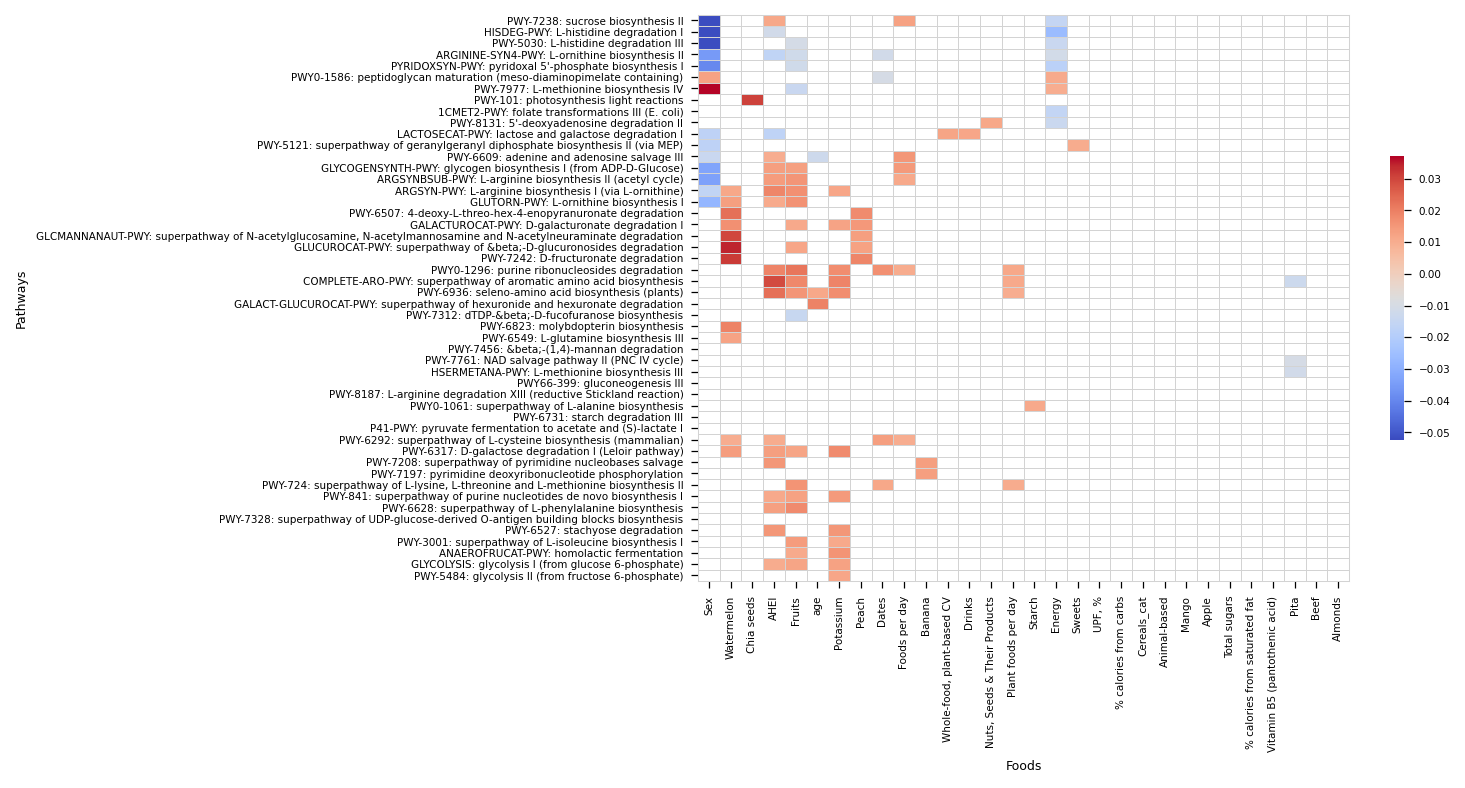

In [265]:
# Version formatted to match the context heatmap (species x foods style), but for pathways
def main_predictors_heatmap(mean_abs_df, cluster=False):
    plt.style.use(double_style)

    # --- Step 1: pick top 40 targets by your current metric (predictive_gains) ---
    top_40_indices = predictive_gains.sort_values(ascending=False).head(50).index
    print("Top 40 indices from predictive_gains:", top_40_indices)

    # --- Step 2: subset to these targets (columns) using your current mean_abs_df ---
    top_40_indices_str = [str(i) for i in top_40_indices]
    mean_abs_shap_top = mean_abs_df[top_40_indices_str]
    print("Subset of mean_abs_shap using top 40 indices:\n", mean_abs_shap_top)

    # --- Step 3: select top 20 foods/features by max value across the selected targets ---
    top_20_features = mean_abs_shap_top.max(axis=1).nlargest(30).index
    print("Top 20 features with highest max mean_abs_shap values:", top_20_features)

    # --- Step 4: subset rows to selected foods/features ---
    heatmap_data = mean_abs_shap_top.loc[top_20_features]
    print("Final heatmap data shape before transpose (foods x targets):", heatmap_data.shape)
    print("Sample of heatmap data:\n", heatmap_data.head())

    # --- Percentile limits like in context ---
    percentile_99 = heatmap_data.quantile(0.99).max()
    percentile_1 = heatmap_data.quantile(0.01).min()
    print("99th percentile value:", percentile_99)
    print("1st percentile value:", percentile_1)

    # ---- Change to long: targets (pathways) as rows, foods as columns ----
    heatmap_data = heatmap_data.T  # now pathways/targets x foods
    print("Final heatmap data shape after transpose (targets x foods):", heatmap_data.shape)

    # --- Rename axis labels to match context style ---
    # Rows: pathway/target names from your existing 'targets'
    heatmap_data.index = [targets[int(i)] for i in top_40_indices]
    print(heatmap_data.index.tolist())
    # Columns: food names then pretty labels via diet_rename_dict
    heatmap_data.columns = [all_features[int(i)] for i in top_20_features]
    heatmap_data.columns = [diet_rename_dict.get(c, c) for c in heatmap_data.columns]

    print("Updated row labels (pathways/targets):", heatmap_data.index.tolist())
    print("Updated column labels (foods):", heatmap_data.columns.tolist())

    # --- Optional flat clustering on rows only (average linkage, euclidean), no dendrogram ---
    if cluster and heatmap_data.shape[0] > 1:
        from scipy.cluster.hierarchy import linkage, leaves_list
        from scipy.spatial.distance import pdist

        row_dist = pdist(heatmap_data.values, metric='euclidean')
        Zr = linkage(row_dist, method='average')
        row_order = leaves_list(Zr)
        heatmap_data = heatmap_data.iloc[row_order, :]  # reorder rows only

    # --- Plot to match context look ---
    zero_threshold = 0.01
    mask = heatmap_data.abs() < zero_threshold

    cell_height = 0.1
    fig_height = len(heatmap_data) * cell_height
    fig_width = plt.rcParams['figure.figsize'][0]  # keep default width like context

    plt.figure(figsize=(fig_width, fig_height))
    ax = sns.heatmap(
        heatmap_data,
        cmap="coolwarm",
        annot=False,
        vmax=percentile_99,
        vmin=percentile_1,
        mask=mask,
        cbar=True,
        cbar_kws={"shrink": 0.5},
        linewidths=0.4,
        linecolor='lightgray'
    )

    # Axes and colorbar like context
    heat_ax = ax
    cbar_ax = ax.figure.axes[-1]

    heat_ax.set_xlabel("Foods")
    heat_ax.set_ylabel("Pathways")
    heat_ax.tick_params(axis='x', labelsize=5)
    heat_ax.tick_params(axis='y', labelsize=5)
    cbar_ax.tick_params()

    # Heatmap border
    for spine in heat_ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor('lightgray')
        spine.set_linewidth(0.5)

    # --- Save names mirror the context, but under /pathways and with _clustered when applicable ---
    out_base = home_path + f"figures/{PROBLEM}/pathways/shap_main_predictors{aggregation}_pathways"
    if cluster:
        plt.savefig(out_base + "_clustered.png", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02)
        plt.savefig(out_base + "_clustered.pdf", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', pad_inches=0.02, format='pdf')
    else:
        plt.savefig(out_base + ".png", dpi=400, facecolor="white", transparent=False, bbox_inches='tight')
        plt.savefig(out_base + ".pdf", dpi=400, facecolor="white", transparent=False, bbox_inches='tight', format='pdf')

    plt.show()


# keep your existing selection logic for pathways data
if aggregate_features:
    mean_abs_df = mean_abs_shap_lgbm_pathways_agg
else:
    mean_abs_df = signed_mean_abs_shap

# call with cluster=True to apply the flat clustering without dendrogram
main_predictors_heatmap(mean_abs_df, cluster=True)


Top 100 indices from lgbm_diet_scores: Int64Index([310, 152, 172, 231,  57, 232, 319,  61, 154, 155, 160,  20, 276,
            109, 251, 173, 149,   9,  95,  89, 226, 174,  45, 262,   6,   7,
             70, 106, 261, 170, 159,  16,  13, 255, 256, 130,  35,  43, 204,
             25, 279, 127,   8,  18, 107, 177,   3, 166, 252, 153, 165,  28,
            200, 219,  63, 164,   5, 291, 305, 236, 267, 233, 151,  71,  94,
            234, 316,  41, 302, 202, 292, 244, 189, 179, 100, 285, 304, 168,
            265,  69,   0,  32, 263,  15,  86,  49,  88, 104, 111, 268, 301,
            188, 270, 120,  87,  96, 318,  19, 266, 225],
           dtype='int64')
Subset of mean_abs_shap using top 100 indices:
           310       152       172       231        57       232       319  \
0    0.000032  0.000000  0.000018  0.000007  0.000006  0.000000  0.000000   
1    0.000010  0.000022  0.000011  0.000126  0.000009  0.000000  0.000181   
2    0.000029  0.000079  0.000157  0.000073  0.000014  0.00

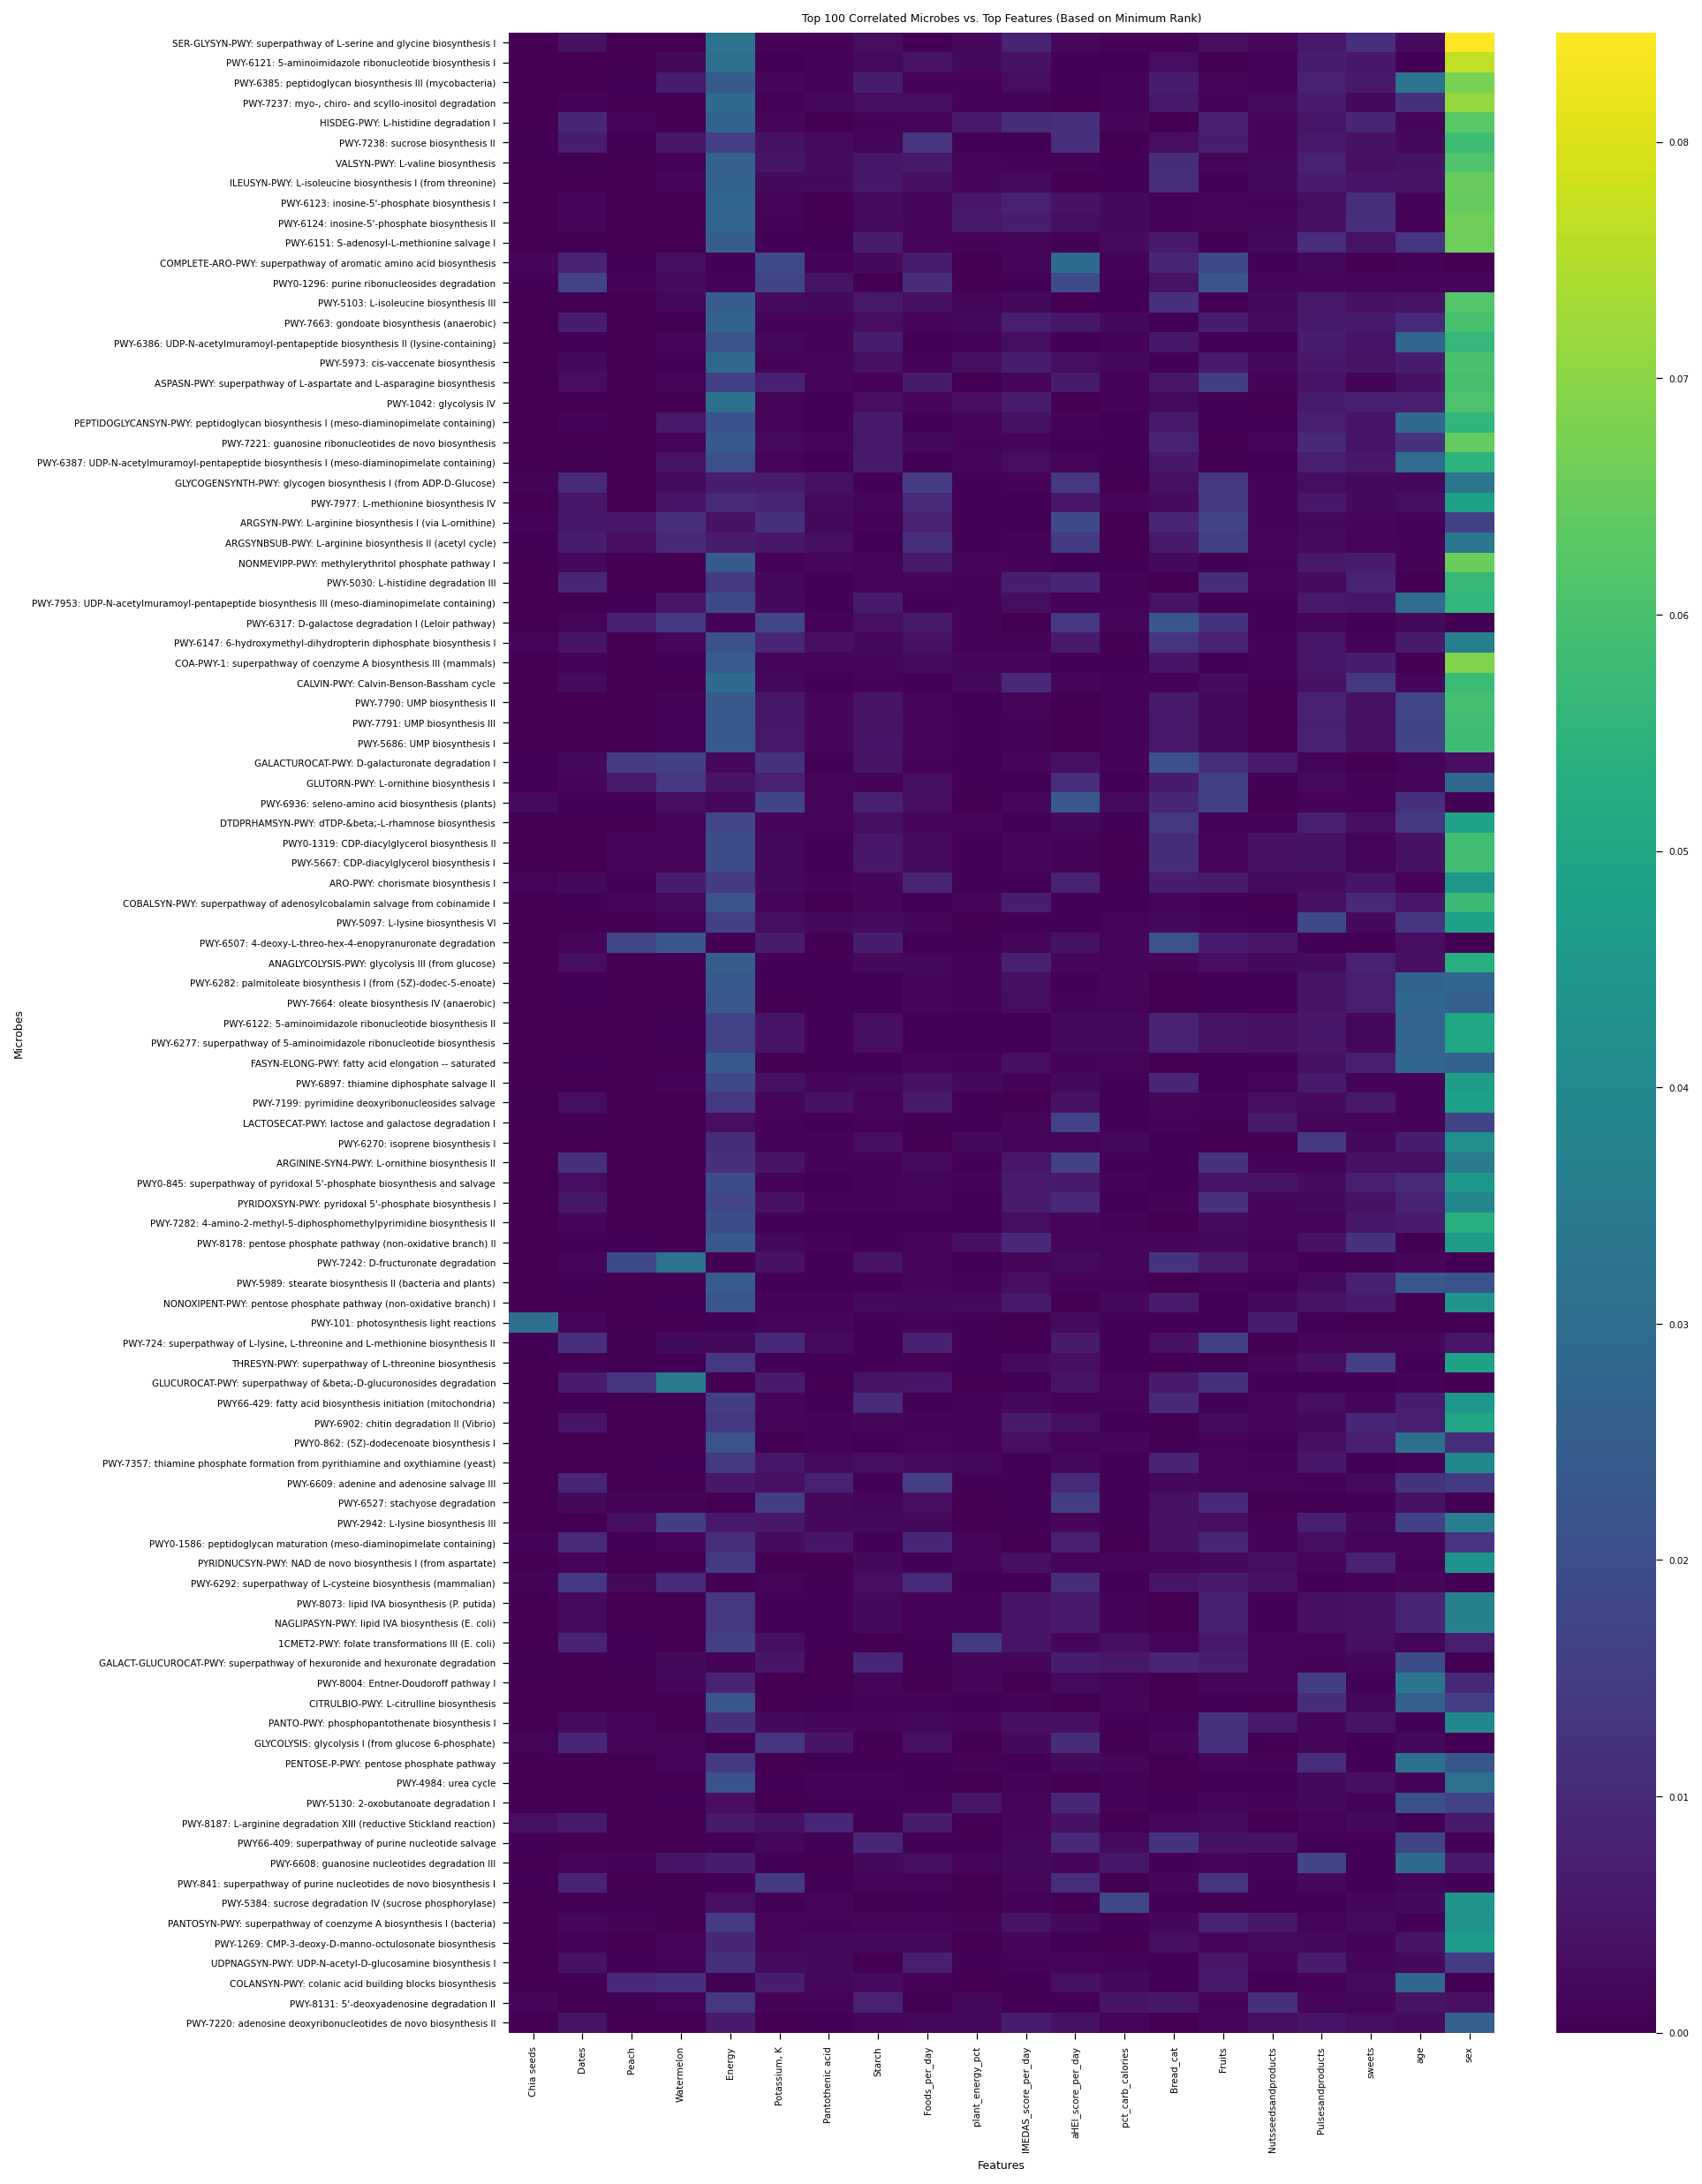

In [257]:
# Assume `mean_abs_shap_lgbm_pathways` and `lgbm_diet_scores` DataFrames are already loaded

# Step 1: Extract the indices of the top 100 highest correlated microbes
top_100_indices = lgbm_diet_scores.sort_values(ascending=False).head(100).index
print("Top 100 indices from lgbm_diet_scores:", top_100_indices)

# Step 2: Subset mean_abs_shap using these indices
top_100_indices_str = [str(i) for i in top_100_indices]
shap_values_top_100 = mean_abs_shap_lgbm_pathways[top_100_indices_str]
print("Subset of mean_abs_shap using top 100 indices:\n", shap_values_top_100)

# Step 3: Compute ranks
ranks = shap_values_top_100.rank(ascending=False)

# # Step 4: Identify the 30 features with the lowest average ranks
# # top_30_features = ranks.mean(axis=1).nsmallest(30).index
# top_30_features = ranks.min(axis=1).nsmallest(30).index
# print("Top 30 features with lowest mean ranks:", top_30_features)

top_30_features = ranks[ranks.min(axis=1) <= 2].index
print("Features with a min rank of 1.0:", top_30_features)


# Step 5: Subset the DataFrame to include only the selected features
heatmap_data = shap_values_top_100.loc[top_30_features]
print("Final heatmap data shape:", heatmap_data.shape)
print("Sample of heatmap data:\n", heatmap_data.head())

# Step 6: Rename the axis labels
heatmap_data = heatmap_data.T
# Replace x-axis (columns) with corresponding feature names
heatmap_data.columns = [all_features[int(i)] for i in top_30_features]

# Replace y-axis (rows) with corresponding target names
heatmap_data.index = [targets[int(i)] for i in top_100_indices]

print("Updated column labels (features):", heatmap_data.columns.tolist())
print("Updated row labels (targets):", heatmap_data.index.tolist())

# Step 7: Plot the heatmap
plt.figure(figsize=(12, 20))
sns.heatmap(heatmap_data, cmap="viridis", annot=False)
plt.title("Top 100 Correlated Microbes vs. Top Features (Based on Minimum Rank)")
plt.xlabel("Features")
plt.ylabel("Microbes")
# plt.savefig(home_path + f"figures/{PROBLEM}/pathways/shap_main_predictors_mean_rank.png", dpi=300, facecolor="white", transparent=False, bbox_inches='tight')
plt.show()


### Count Main Predictors

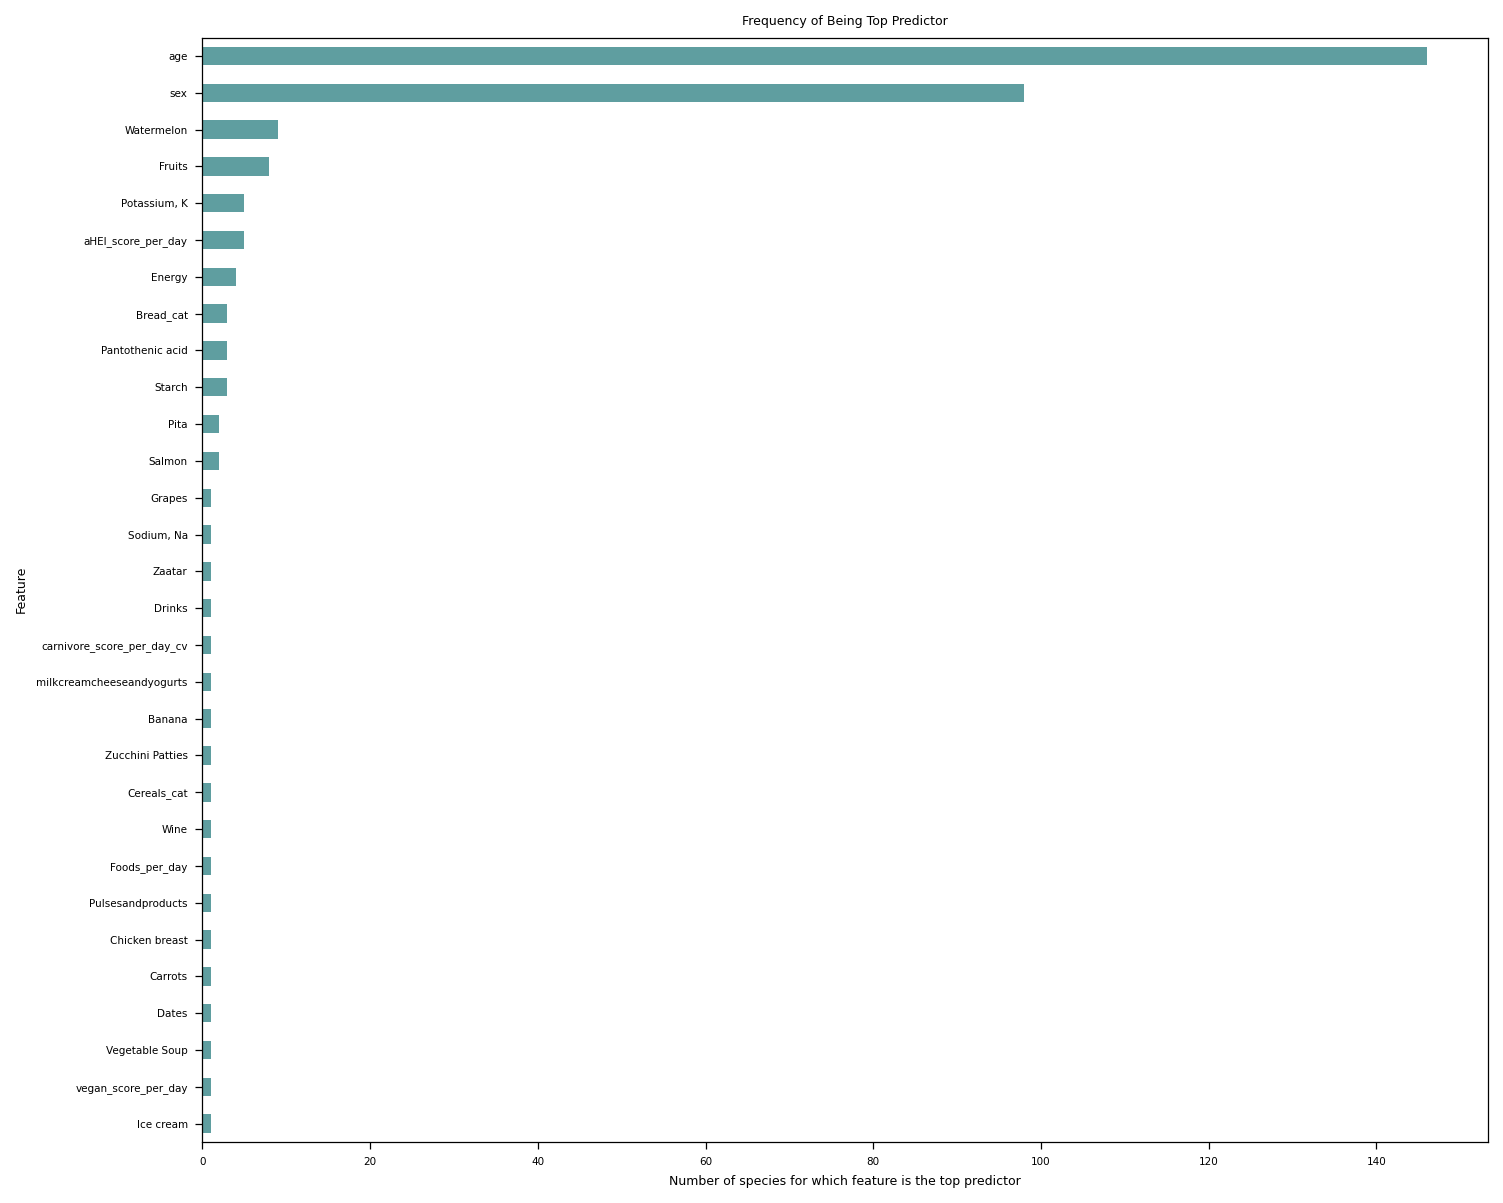

In [258]:
# Step 1: For each target (column), find the feature (row) with the max SHAP value
top_predictors = mean_abs_shap_lgbm_pathways.idxmax(axis=0)

# Step 2: Count how many times each feature was a top predictor
top_counts = top_predictors.value_counts()

# Step 3: Get top 30 features by count
top_30_features = top_counts.head(30)

# Step 4: Map feature indices to their names
top_30_features.index = [all_features[int(i)] for i in top_30_features.index]

# Step 5: Plot
plt.figure(figsize=(10, 8))
top_30_features.sort_values().plot(kind='barh', color='cadetblue')
plt.xlabel("Number of species for which feature is the top predictor")
plt.ylabel("Feature")
plt.title("Frequency of Being Top Predictor")
plt.tight_layout()
plt.show()


### Diet contributions

/usr/wisdom/python3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


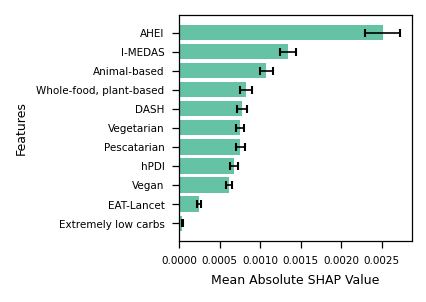

In [259]:
diet_scores_features = [
    'vegetarian_score_per_day', 'wfpb_score_per_day', 'vegan_score_per_day', 
    'pescatarian_score_per_day', 'carnivore_score_per_day', 'pct_NOVA_4',
    'IMEDAS_score_per_day', 'eatLANCET_score_per_day', 'aHEI_score_per_day', 'hPDI_score_per_day', 
    'DASH_score', 'keto', 'Low carb diet', 'NOVA Score'
]

shap_data = process_mean_abs_shap(
    mean_abs_shap_df = mean_abs_shap_lgbm_pathways, 
    all_features = all_features, 
    top_n = 20,
    selected_features=diet_scores_features
    )

In [260]:
map_df.loc[map_df['targets'].str.contains('fBin__108|gBin__525|sBin__778')]

,Pearson Correlation,targets
